# Imports


In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Function

In [3]:
def dropna(data):
    print('Original shape', data.shape)
    data.dropna(axis=0, inplace=True)
    data = data.reset_index(drop=True)
    print('After dropna', data.shape)
    for col in data.columns: 
        if col != 'Country':
            data.drop(data.loc[data[col]=='..'].index, inplace=True)
    print('After drop ".."', data.shape)
    return data

In [4]:
def statistical_info(data):
    statistical = [
        ['Mean', data.mean()],
        ['Median', data.median()],
        ['Mode', data.mode()],
        ['Standard deviation', data.std()],
        ['Min', data.min()],
        ['Max', data.max()],
        ['Quantile', data.quantile([.25, .5,.75])]
            ]
    df = pd.DataFrame(statistical, columns = ['Statistical', 'Value'])
    print(df.to_markdown())
    return df



In [64]:
def to_float(series):
    series = series.str.replace(',','.').str.replace('−','-').astype(float)
    return series

In [65]:
def to_float_coma(series):
    series =  series.str.replace(',','').astype(float)
    return series

In [118]:
def to_float_dot(series):
    series =  series.str.replace('.','').astype(float)
    return series

In [20]:
def plot_distribution(data, name, col):
    %matplotlib inline
    data = data.astype(float).sort_values(ascending=True)
    fig = plt.figure() 
    fig.set_size_inches(5, 3)
    ax = data.hist(color = '#FF7F00')
    plt.xlabel(col)
    plt.ylabel('Frecuency')
    plt.title(name)
    plt.grid(True)
    plt.show()


# Main

In [7]:
ROOT_DIR = os.getcwd()
print(ROOT_DIR)
filename = 'key_names.txt'
path_data = '/home/tamara/Documents/U/Memoria/memoria/Data/COVID-19_non_related/'




/home/tamara/Documents/U/Memoria/memoria/Script


___
___
___
# Air Pollution

## Ambient PM2.5 air pollution

In [16]:
PM25_air_pollution = pd.read_csv(path_data + 'PM25_air_pollution.tsv', sep='\t')

In [17]:
PM25_air_pollution

,Country,mean annual exposure
0,Afghanistan,56.3
1,Albania,18.2
2,Algeria,39.9
3,American Samoa,12.4
4,Andorra,10.3
...,...,...
221,Sub-Saharan Africa,44.4
222,Low income,42.5
223,Lower middle income,67.3
224,Upper middle income,36.9


In [18]:
PM25_air_pollution = dropna(PM25_air_pollution)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (206, 2)


In [35]:
PM25_air_pollution[col].astype(float).mean()

27.677669902912623

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 27.677669902912623                         |
|  1 | Median             | 21.7                                       |
|  2 | Mode               | 0    10.3                                  |
|    |                    | 1    11.6                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 18.907938361459415                         |
|  4 | Min                | 5.9                                        |
|  5 | Max                | 98.1                                       |
|  6 | Quantile           | 0.25    13.80                              |
|    |                    | 0.50    21.70                              |
|    |                    | 0.75    37.95                              |
|    |                    | Name: mean annual expos

<IPython.core.display.Javascript object>


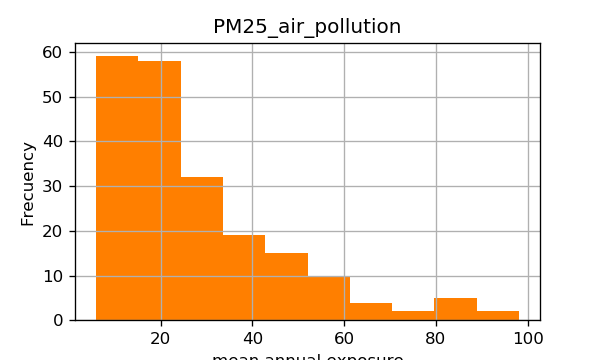

In [64]:
for col in PM25_air_pollution.columns: 
        if col != 'Country':
            statistical_info(PM25_air_pollution[col].astype(float))
            plot_distribution(PM25_air_pollution[col], 'PM25_air_pollution', col)

___
___
___
# Temperature

## Highest temperatures ever recorded

In [16]:
 highest_temperatures= pd.read_csv(path_data + 'highest_temperatures.tsv', sep='\t')

In [17]:
highest_temperatures

,Country,Temperature (°C),Date
0,Algeria,"51,30",5 July 2018
1,Botswana,"44,00",7 January 2016
2,Burkina Faso,"47,20","1.984,00"
3,Chad,"47,60",22 June 2010
4,Comoros,"36,00",15 November 2017
...,...,...,...
129,Colombia,"45,00",29 December 2015
130,French Guiana,"38,00",27 September 2016
131,Paraguay,"45,00",14 November 2009
132,Uruguay,"44,00",20 January 1943


In [18]:
 highest_temperatures = dropna(highest_temperatures)

Original shape (134, 3)
After dropna (127, 3)
After drop ".." (127, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 43.15275590551181                      |
|  1 | Median             | 42.8                                   |
|  2 | Mode               | 0    45.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 5.770324009109344                      |
|  4 | Min                | 29.1                                   |
|  5 | Max                | 56.7                                   |
|  6 | Quantile           | 0.25    39.0                           |
|    |                    | 0.50    42.8                           |
|    |                    | 0.75    47.1                           |
|    |                    | Name: Temperature (°C), dtype: float64 |


<IPython.core.display.Javascript object>


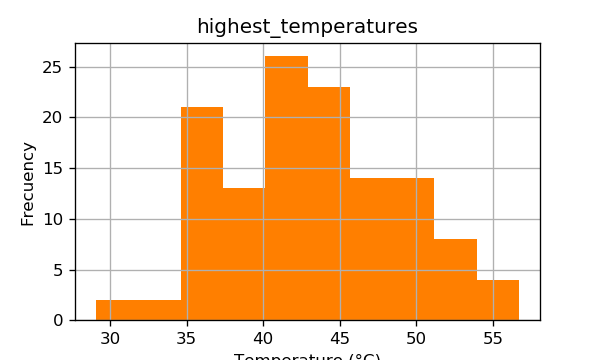

In [37]:
for col in highest_temperatures.columns: 
        if col == 'Temperature (°C)':
            series = highest_temperatures[col].str.replace(',','.').astype(float)
            statistical_info(series)
            plot_distribution(series, 'highest_temperatures', col)

## Lowest temperatures ever recorded

In [40]:
lowest_temperatures= pd.read_csv(path_data + 'lowest_temperatures.tsv', sep='\t')

In [41]:
lowest_temperatures

,Country,Temperature (C),Date
0,Algeria,−13.8,28 January 2005
1,Burkina Faso,"5,00",January 1975
2,Botswana,−15.0,NaN
3,Eswatini,−6.7,NaN
4,Ghana,"11,00",NaN
...,...,...,...
107,Hawaii,−11.1,17 may. 1979
108,New Zealand,−25.6,18 July 1903
109,Samoa,11.1,29 September 1971
110,Solomon Islands,"17,00",30 June 2016


In [43]:
lowest_temperatures = dropna(lowest_temperatures)

Original shape (112, 3)
After dropna (99, 3)
After drop ".." (99, 3)


|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | -24.03535353535353                    |
|  1 | Median             | -27.2                                 |
|  2 | Mode               | 0   -41.0                             |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 22.568694740097325                    |
|  4 | Min                | -69.6                                 |
|  5 | Max                | 19.0                                  |
|  6 | Quantile           | 0.25   -41.85                         |
|    |                    | 0.50   -27.20                         |
|    |                    | 0.75    -5.70                         |
|    |                    | Name: Temperature (C), dtype: float64 |


<IPython.core.display.Javascript object>


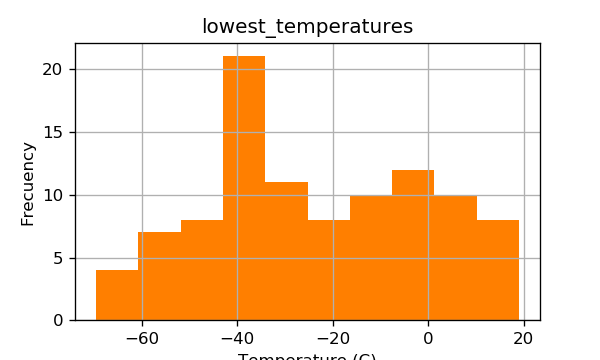

In [48]:
for col in lowest_temperatures.columns: 
        if col == 'Temperature (C)':
            series = lowest_temperatures[col].str.replace(',','.').str.replace('−','-').astype(float)
            statistical_info(series)
            plot_distribution(series, 'lowest_temperatures', col)

## Population affected by droughts, floods, and extreme temperatures

In [49]:
population_affected_droughts= pd.read_csv(path_data + 'population_affected_droughts.tsv', sep='\t')

In [50]:
population_affected_droughts

,Country,average annual
0,Afghanistan,1.1
1,Albania,5.3
2,Algeria,0
3,American Samoa,0
4,Andorra,..
...,...,...
221,Sub-Saharan Africa,..
222,Low income,..
223,Lower middle income,..
224,Upper middle income,..


In [51]:
population_affected_droughts = dropna(population_affected_droughts)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (168, 2)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 1.1714285714285708                   |
|  1 | Median             | 0.25                                 |
|  2 | Mode               | 0    0.0                             |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 1.9583123266016842                   |
|  4 | Min                | 0.0                                  |
|  5 | Max                | 9.2                                  |
|  6 | Quantile           | 0.25    0.00                         |
|    |                    | 0.50    0.25                         |
|    |                    | 0.75    1.30                         |
|    |                    | Name: average annual, dtype: float64 |


<IPython.core.display.Javascript object>


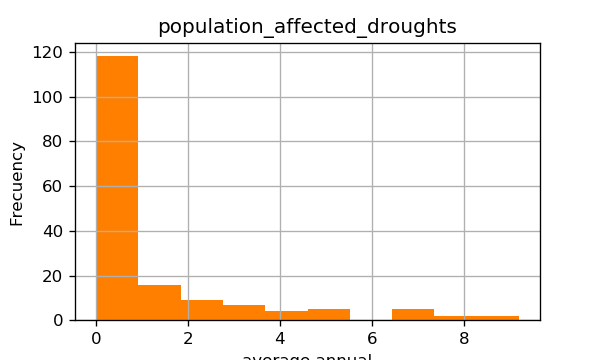

In [52]:
for col in population_affected_droughts.columns: 
        if col != 'Country':
            series = population_affected_droughts[col].str.replace(',','.').astype(float)
            statistical_info(series)
            plot_distribution(series, 'population_affected_droughts', col)

___
___
___
# Pollution

## Local pollution damage

In [54]:
local_pollution_damage= pd.read_csv(path_data + 'savings_local_pollution_damage.tsv', sep='\t')

In [55]:
local_pollution_damage

,Country,Savings %
0,Afghanistan,1.9
1,Albania,0.2
2,Algeria,0.1
3,American Samoa,..
4,Andorra,..
...,...,...
221,Sub-Saharan Africa,0.9
222,Low income,1.1
223,Lower middle income,0.7
224,Upper middle income,0.3


In [56]:
local_pollution_damage = dropna(local_pollution_damage)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (184, 2)


|    | Statistical        | Value                           |
|---:|:-------------------|:--------------------------------|
|  0 | Mean               | 0.42282608695652213             |
|  1 | Median             | 0.2                             |
|  2 | Mode               | 0    0.1                        |
|    |                    | dtype: float64                  |
|  3 | Standard deviation | 0.4420773764257178              |
|  4 | Min                | 0.0                             |
|  5 | Max                | 2.4                             |
|  6 | Quantile           | 0.25    0.1                     |
|    |                    | 0.50    0.2                     |
|    |                    | 0.75    0.6                     |
|    |                    | Name: Savings %, dtype: float64 |


<IPython.core.display.Javascript object>


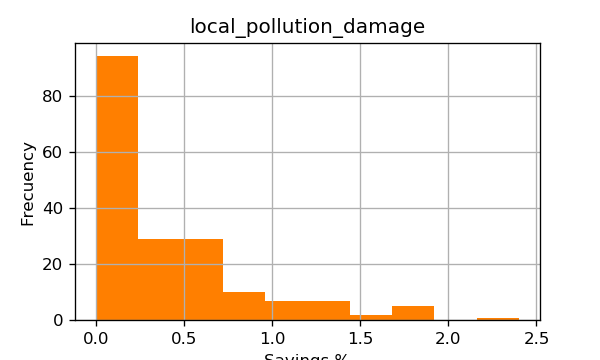

In [57]:
for col in local_pollution_damage.columns: 
        if col != 'Country':
            series = to_float(local_pollution_damage[col])
            statistical_info(series)
            plot_distribution(series, 'local_pollution_damage', col)

___
___
___
# Precipitation

## Average annual precipitation

In [58]:
average_annual_precipitation= pd.read_csv(path_data + 'average_annual_precipitation.tsv', sep='\t')

In [59]:
average_annual_precipitation

,Country,Avg
0,Afghanistan,327
1,Albania,1485
2,Algeria,89
3,American Samoa,..
4,Andorra,..
...,...,...
221,Low income,..
222,Lower middle income,..
223,Upper middle income,..
224,High income,..


In [60]:
average_annual_precipitation = dropna(average_annual_precipitation)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (190, 2)


|    | Statistical        | Value                     |
|---:|:-------------------|:--------------------------|
|  0 | Mean               | 1124.0105263157895        |
|  1 | Median             | 972.0                     |
|  2 | Mode               | 0       56.0              |
|    |                    | 1      161.0              |
|    |                    | 2      206.0              |
|    |                    | 3      228.0              |
|    |                    | 4      241.0              |
|    |                    | 5      250.0              |
|    |                    | 6      282.0              |
|    |                    | 7      494.0              |
|    |                    | 8      560.0              |
|    |                    | 9      630.0              |
|    |                    | 10     686.0              |
|    |                    | 11     758.0              |
|    |                    | 12     788.0              |
|    |                    | 13     900.0        

<IPython.core.display.Javascript object>


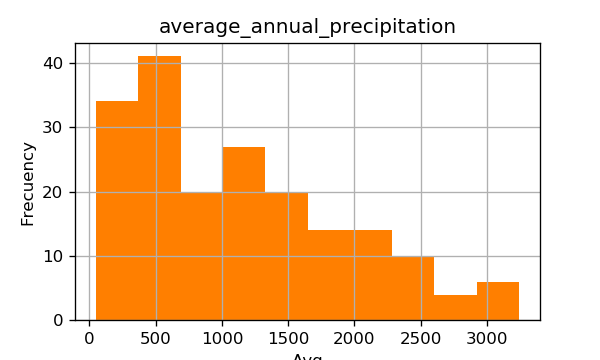

In [61]:
for col in average_annual_precipitation.columns: 
        if col != 'Country':
            series = to_float(average_annual_precipitation[col])
            statistical_info(series)
            plot_distribution(series, 'average_annual_precipitation', col)

___
___
___
# Obesity

## Obesity rate

In [8]:
obesity_rate= pd.read_csv(path_data + 'obesity_rate.tsv', sep='\t')

In [9]:
obesity_rate

,Country,Obesity rate %
0,Nauru,61.0
1,Cook Islands,55.9
2,Palau,55.3
3,Marshall Islands,52.9
4,Tuvalu,51.6
...,...,...
186,Cambodia,3.9
187,India,3.9
188,Timor-Leste,3.8
189,Bangladesh,3.6


In [10]:
obesity_rate = dropna(obesity_rate)

Original shape (191, 2)
After dropna (191, 2)
After drop ".." (191, 2)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | 19.95549738219895                     |
|  1 | Median             | 20.6                                  |
|  2 | Mode               | 0    20.2                             |
|    |                    | 1    23.1                             |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 11.417021394149476                    |
|  4 | Min                | 2.1                                   |
|  5 | Max                | 61.0                                  |
|  6 | Quantile           | 0.25     9.55                         |
|    |                    | 0.50    20.60                         |
|    |                    | 0.75    25.65                         |
|    |                    | Name: Obesity rate % , dtype: float64 |


<IPython.core.display.Javascript object>


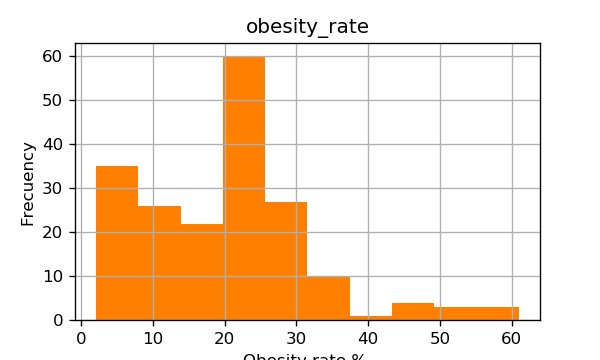

In [14]:
for col in obesity_rate.columns: 
        if col != 'Country':
            series = obesity_rate[col]
            statistical_info(series)
            plot_distribution(series, 'obesity_rate', col)

## Body mass index

In [15]:
 bmi= pd.read_csv(path_data + 'bmi.tsv', sep='\t')

In [16]:
bmi

,Country,Overall mean,Female mean,Male mean
0,Nauru,32.5,32.8,32.1
1,Tonga,31.9,33.5,30.4
2,Samoa,31.7,33.5,29.9
3,Kuwait,30.0,30.8,29.5
4,Saint Kitts and Nevis,29.7,30.9,28.4
...,...,...,...,...
185,Madagascar,21.1,21.2,20.9
186,Bangladesh,21.0,21.2,20.7
187,Burundi,20.9,21.3,20.4
188,Ethiopia,20.6,21.0,20.2


In [17]:
 bmi = dropna(bmi)

Original shape (190, 4)
After dropna (190, 4)
After drop ".." (190, 4)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                               |
|---:|:-------------------|:------------------------------------|
|  0 | Mean               | 25.673157894736867                  |
|  1 | Median             | 26.0                                |
|  2 | Mode               | 0    26.2                           |
|    |                    | dtype: float64                      |
|  3 | Standard deviation | 2.3318738125342136                  |
|  4 | Min                | 20.5                                |
|  5 | Max                | 32.5                                |
|  6 | Quantile           | 0.25    23.925                      |
|    |                    | 0.50    26.000                      |
|    |                    | 0.75    27.200                      |
|    |                    | Name: Overall mean , dtype: float64 |


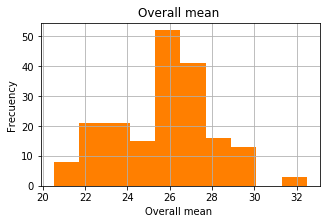

|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 26.043684210526308                 |
|  1 | Median             | 26.0                               |
|  2 | Mode               | 0    27.1                          |
|    |                    | dtype: float64                     |
|  3 | Standard deviation | 2.51287417498889                   |
|  4 | Min                | 21.0                               |
|  5 | Max                | 33.5                               |
|  6 | Quantile           | 0.25    24.3                       |
|    |                    | 0.50    26.0                       |
|    |                    | 0.75    27.5                       |
|    |                    | Name: Female mean , dtype: float64 |


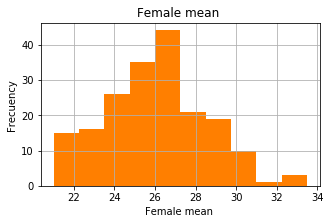

|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 25.30357894736842                |
|  1 | Median             | 25.85                            |
|  2 | Mode               | 0    26.5                        |
|    |                    | 1    27.6                        |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 2.3878674445805768               |
|  4 | Min                | 20.1                             |
|  5 | Max                | 32.1                             |
|  6 | Quantile           | 0.25    23.20                    |
|    |                    | 0.50    25.85                    |
|    |                    | 0.75    27.08                    |
|    |                    | Name: Male mean , dtype: float64 |


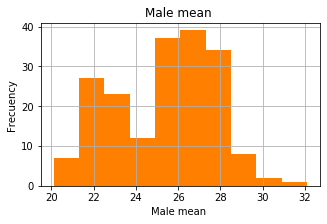

In [21]:
for col in bmi.columns: 
        if col != 'Country':
            series = bmi[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Age

## Median Age

In [25]:
median_age= pd.read_csv(path_data + 'median_age.tsv', sep='\t')

In [26]:
median_age

,Country,Age
0,Monaco,55.4
1,Japan,48.6
2,Saint Pierre and Miquelon,48.5
3,Germany,47.8
4,Italy,46.5
...,...,...
223,Chad,16.1
224,Mali,"16,00"
225,Angola,15.9
226,Uganda,15.7


In [27]:
median_age = dropna(median_age)

Original shape (228, 2)
After dropna (228, 2)
After drop ".." (228, 2)


|    | Statistical        | Value                     |
|---:|:-------------------|:--------------------------|
|  0 | Mean               | 31.494298245614043        |
|  1 | Median             | 31.4                      |
|  2 | Mode               | 0    20.3                 |
|    |                    | 1    24.1                 |
|    |                    | dtype: float64            |
|  3 | Standard deviation | 9.084634504858695         |
|  4 | Min                | 14.8                      |
|  5 | Max                | 55.4                      |
|  6 | Quantile           | 0.25    23.975            |
|    |                    | 0.50    31.400            |
|    |                    | 0.75    39.125            |
|    |                    | Name: Age, dtype: float64 |


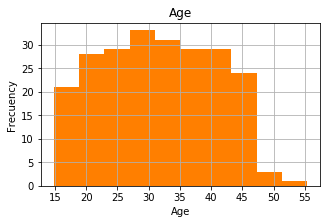

In [28]:
for col in median_age.columns: 
        if col != 'Country':
            series = to_float(median_age[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Population age composition

In [29]:
population_age_composition= pd.read_csv(path_data + 'population_age_composition.tsv', sep='\t')

In [30]:
population_age_composition

,Country,Ages 0-14,Ages 15-64,Ages 65+
0,Afghanistan,42,55,3
1,Albania,17,68,14
2,Algeria,31,63,7
3,American Samoa,..,..,..
4,Andorra,..,..,..
...,...,...,...,...
221,Sub-Saharan Africa,42,55,3
222,Low income,42,55,3
223,Lower middle income,30,64,6
224,Upper middle income,21,69,10


In [31]:
population_age_composition = dropna(population_age_composition)

Original shape (226, 4)
After dropna (226, 4)
After drop ".." (205, 4)


|    | Statistical        | Value                           |
|---:|:-------------------|:--------------------------------|
|  0 | Mean               | 27.17560975609756               |
|  1 | Median             | 26.0                            |
|  2 | Mode               | 0    16.0                       |
|    |                    | dtype: float64                  |
|  3 | Standard deviation | 10.240174163840509              |
|  4 | Min                | 12.0                            |
|  5 | Max                | 50.0                            |
|  6 | Quantile           | 0.25    18.0                    |
|    |                    | 0.50    26.0                    |
|    |                    | 0.75    37.0                    |
|    |                    | Name: Ages 0-14, dtype: float64 |


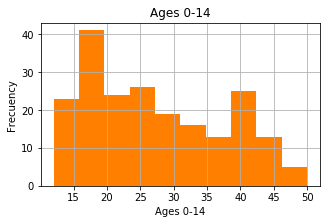

|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 63.71219512195122                |
|  1 | Median             | 65.0                             |
|  2 | Mode               | 0    65.0                        |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 6.148497151064051                |
|  4 | Min                | 48.0                             |
|  5 | Max                | 85.0                             |
|  6 | Quantile           | 0.25    60.0                     |
|    |                    | 0.50    65.0                     |
|    |                    | 0.75    67.0                     |
|    |                    | Name: Ages 15-64, dtype: float64 |


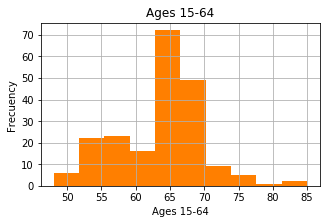

|    | Statistical        | Value                          |
|---:|:-------------------|:-------------------------------|
|  0 | Mean               | 9.126829268292683              |
|  1 | Median             | 7.0                            |
|  2 | Mode               | 0    3.0                       |
|    |                    | dtype: float64                 |
|  3 | Standard deviation | 6.3534391022965035             |
|  4 | Min                | 1.0                            |
|  5 | Max                | 28.0                           |
|  6 | Quantile           | 0.25     4.0                   |
|    |                    | 0.50     7.0                   |
|    |                    | 0.75    15.0                   |
|    |                    | Name: Ages 65+, dtype: float64 |


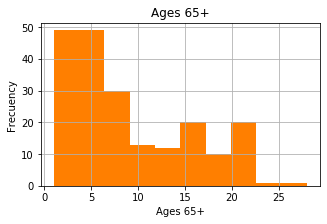

In [32]:
for col in population_age_composition.columns: 
        if col != 'Country':
            series = to_float(population_age_composition[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Cancer

## Cancer frequency

In [33]:
cancer_rate= pd.read_csv(path_data + 'cancer_rate.tsv', sep='\t')

In [34]:
cancer_rate

,Country,Cancer rate
0,Australia,468.0
1,New Zealand,438.1
2,Ireland,373.7
3,Hungary,368.1
4,United States,352.2
5,Belgium,345.8
6,France,344.1
7,Denmark,340.4
8,Norway,337.8
9,Netherlands,334.1


In [35]:
cancer_rate = dropna(cancer_rate)

Original shape (50, 2)
After dropna (50, 2)
After drop ".." (50, 2)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                             |
|---:|:-------------------|:----------------------------------|
|  0 | Mean               | 294.0819999999999                 |
|  1 | Median             | 286.5                             |
|  2 | Mode               | 0    242.8                        |
|    |                    | 1    250.8                        |
|    |                    | dtype: float64                    |
|  3 | Standard deviation | 50.02662837868223                 |
|  4 | Min                | 233.6                             |
|  5 | Max                | 468.0                             |
|  6 | Quantile           | 0.25    253.900                   |
|    |                    | 0.50    286.500                   |
|    |                    | 0.75    317.775                   |
|    |                    | Name: Cancer rate, dtype: float64 |


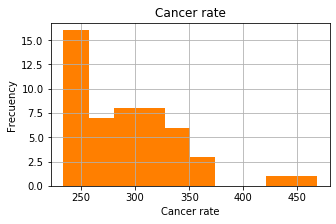

In [37]:
for col in cancer_rate.columns: 
        if col != 'Country':
            series = cancer_rate[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Smoking

## Prevalence of smoking

In [38]:
prevalence_smoking= pd.read_csv(path_data + 'prevalence_smoking.tsv', sep='\t')

In [39]:
prevalence_smoking

,Country,Male,Female
0,Afghanistan,..,..
1,Albania,51,7
2,Algeria,30,1
3,American Samoa,..,..
4,Andorra,38,29
...,...,...,...
221,Sub-Saharan Africa,18,2
222,Low income,..,..
223,Lower middle income,27,2
224,Upper middle income,45,5


In [40]:
prevalence_smoking = dropna(prevalence_smoking)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (154, 3)


|    | Statistical        | Value                      |
|---:|:-------------------|:---------------------------|
|  0 | Mean               | 32.81818181818182          |
|  1 | Median             | 31.0                       |
|  2 | Mode               | 0    25.0                  |
|    |                    | dtype: float64             |
|  3 | Standard deviation | 13.421986910302094         |
|  4 | Min                | 8.0                        |
|  5 | Max                | 78.0                       |
|  6 | Quantile           | 0.25    23.0               |
|    |                    | 0.50    31.0               |
|    |                    | 0.75    41.0               |
|    |                    | Name: Male, dtype: float64 |


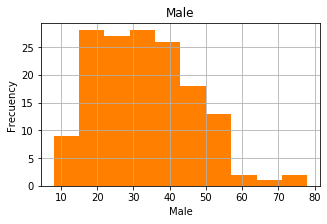

|    | Statistical        | Value                        |
|---:|:-------------------|:-----------------------------|
|  0 | Mean               | 10.532467532467532           |
|  1 | Median             | 6.0                          |
|  2 | Mode               | 0    2.0                     |
|    |                    | dtype: float64               |
|  3 | Standard deviation | 10.384231907216854           |
|  4 | Min                | 0.0                          |
|  5 | Max                | 44.0                         |
|  6 | Quantile           | 0.25     2.0                 |
|    |                    | 0.50     6.0                 |
|    |                    | 0.75    19.0                 |
|    |                    | Name: Female, dtype: float64 |


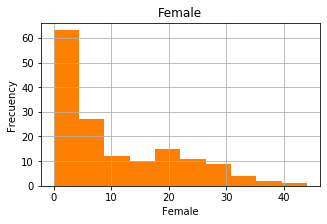

In [42]:
for col in prevalence_smoking.columns: 
        if col != 'Country':
            series = to_float(prevalence_smoking[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Gender

## Population Gender

In [43]:
population_gender= pd.read_csv(path_data + 'population_gender.tsv', sep='\t')

In [44]:
population_gender

,Country,Female %,Male %
0,Aruba,"52,55","47,45"
1,Afghanistan,"48,66","51,34"
2,Angola,"50,53","49,47"
3,Albania,"49,09","50,91"
4,Andorra,NaN,NaN
...,...,...,...
259,Kosovo,NaN,NaN
260,"Yemen, Rep.","49,62","50,38"
261,South Africa,"50,72","49,28"
262,Zambia,"50,49","49,51"


In [45]:
population_gender = dropna(population_gender)

Original shape (264, 3)
After dropna (240, 3)
After drop ".." (240, 3)


|    | Statistical        | Value                          |
|---:|:-------------------|:-------------------------------|
|  0 | Mean               | 49.879541666666675             |
|  1 | Median             | 50.129999999999995             |
|  2 | Mode               | 0    50.08                     |
|    |                    | dtype: float64                 |
|  3 | Standard deviation | 3.0640439065095215             |
|  4 | Min                | 24.67                          |
|  5 | Max                | 54.4                           |
|  6 | Quantile           | 0.25    49.525                 |
|    |                    | 0.50    50.130                 |
|    |                    | 0.75    50.850                 |
|    |                    | Name: Female %, dtype: float64 |


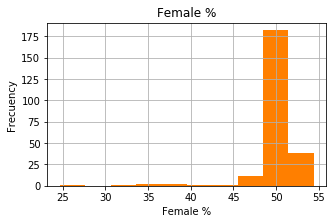

|    | Statistical        | Value                        |
|---:|:-------------------|:-----------------------------|
|  0 | Mean               | 50.120458333333325           |
|  1 | Median             | 49.870000000000005           |
|  2 | Mode               | 0    49.92                   |
|    |                    | dtype: float64               |
|  3 | Standard deviation | 3.0640439065095215           |
|  4 | Min                | 45.6                         |
|  5 | Max                | 75.33                        |
|  6 | Quantile           | 0.25    49.150               |
|    |                    | 0.50    49.870               |
|    |                    | 0.75    50.475               |
|    |                    | Name: Male %, dtype: float64 |


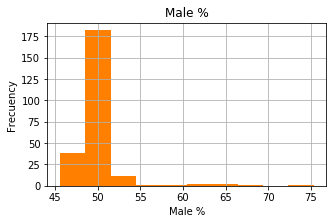

In [49]:
for col in population_gender.columns: 
        if col != 'Country ':
            series = to_float(population_gender[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Density Poblation

## Population density

In [50]:
population_density= pd.read_csv(path_data + 'population_density.tsv', sep='\t')

In [51]:
population_density

,Country,Population density
0,Afghanistan,57
1,Albania,105
2,Algeria,18
3,American Samoa,277
4,Andorra,164
...,...,...
222,Sub-Saharan Africa,51
223,Low income,52
224,Lower middle income,131
225,Upper middle income,49


In [52]:
population_density = dropna(population_density)

Original shape (227, 2)
After dropna (227, 2)
After drop ".." (224, 2)


|    | Statistical        | Value                                    |
|---:|:-------------------|:-----------------------------------------|
|  0 | Mean               | 136.96379464285715                       |
|  1 | Median             | 80.5                                     |
|  2 | Mode               | 0    4.0                                 |
|    |                    | dtype: float64                           |
|  3 | Standard deviation | 159.85121080193773                       |
|  4 | Min                | 0.0                                      |
|  5 | Max                | 861.0                                    |
|  6 | Quantile           | 0.25     31.0                            |
|    |                    | 0.50     80.5                            |
|    |                    | 0.75    193.0                            |
|    |                    | Name: Population density, dtype: float64 |


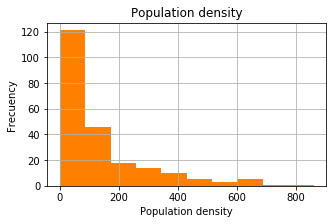

In [53]:
for col in population_density.columns: 
        if col != 'Country':
            series = to_float(population_density[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Income

## Gross national income

In [59]:
gross_national_income= pd.read_csv(path_data + 'gross_national_income.tsv', sep='\t')

In [55]:
gross_national_income

,Country,$ billions,$ per capita
0,Afghanistan,20.7,540
1,Albania,14.9,"5,24"
2,Algeria,170.7,"3,97"
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
222,Sub-Saharan Africa,"1,716.0","1,55"
223,Low income,529.3,792
224,Lower middle income,"6,378.6","2,189"
225,Upper middle income,"25,914.0","9,074"


In [60]:
gross_national_income = dropna(gross_national_income)

Original shape (227, 3)
After dropna (227, 3)
After drop ".." (204, 3)


|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 1733.4857843137252               |
|  1 | Median             | 42.05                            |
|  2 | Mode               | 0    0.4                         |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 8242.414412885208                |
|  4 | Min                | 0.1                              |
|  5 | Max                | 88781.5                          |
|  6 | Quantile           | 0.25      9.550                  |
|    |                    | 0.50     42.050                  |
|    |                    | 0.75    319.075                  |
|    |                    | Name: $ billions, dtype: float64 |


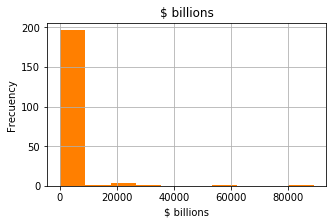

|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 2162.7401960784314                 |
|  1 | Median             | 682.0                              |
|  2 | Mode               | 0    520.0                         |
|    |                    | dtype: float64                     |
|  3 | Standard deviation | 5918.112902043352                  |
|  4 | Min                | 4.0                                |
|  5 | Max                | 63778.0                            |
|  6 | Quantile           | 0.25     349.0                     |
|    |                    | 0.50     682.0                     |
|    |                    | 0.75    1900.0                     |
|    |                    | Name: $ per capita, dtype: float64 |


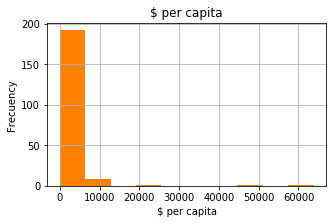

In [66]:
for col in gross_national_income.columns: 
        if col != 'Country':
            series = to_float_coma(gross_national_income[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Percentage share of income or consumption

In [67]:
percentage_share_income= pd.read_csv(path_data + 'percentage_share_income.tsv', sep='\t')

In [68]:
percentage_share_income

,Country,Lowest 20%
0,Afghanistan,2.9
1,Albania,2.2
2,Algeria,0.8
3,American Samoa,2.2
4,Andorra,1.8
...,...,...
221,Sub-Saharan Africa,4.8
222,Low income,2.3
223,Lower middle income,3.9
224,Upper middle income,4.4


In [69]:
percentage_share_income = dropna(percentage_share_income)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (213, 2)


|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 2.5502347417840334               |
|  1 | Median             | 2.4                              |
|  2 | Mode               | 0    2.2                         |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 3.1058773319692063               |
|  4 | Min                | -19.6                            |
|  5 | Max                | 9.8                              |
|  6 | Quantile           | 0.25    1.2                      |
|    |                    | 0.50    2.4                      |
|    |                    | 0.75    4.4                      |
|    |                    | Name: Lowest 20%, dtype: float64 |


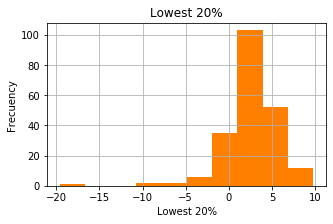

In [70]:
for col in percentage_share_income.columns: 
        if col != 'Country':
            series = to_float(percentage_share_income[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Annualized growth in mean consumption or income per capita

In [71]:
annualized_growth_consumption= pd.read_csv(path_data + 'annualized_growth_consumption.tsv', sep='\t')

In [72]:
annualized_growth_consumption

,Country,Reference Year,Bottom 40%,Total population
0,Afghanistan,..,..,..
1,Albania,2017,2.5,0.8
2,Algeria,..,..,..
3,American Samoa,..,..,..
4,Andorra,..,..,..
...,...,...,...,...
211,Virgin Islands (U.S.),..,..,..
212,West Bank and Gaza,2016,-0.9,-0.6
213,"Yemen, Rep.",..,..,..
214,Zambia,2015,-0.6,2.9


In [73]:
annualized_growth_consumption = dropna(annualized_growth_consumption)

Original shape (216, 4)
After dropna (216, 4)
After drop ".." (90, 4)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 2016.8555555555556                   |
|  1 | Median             | 2017.0                               |
|  2 | Mode               | 0    2017.0                          |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 0.9779721177881481                   |
|  4 | Min                | 2015.0                               |
|  5 | Max                | 2018.0                               |
|  6 | Quantile           | 0.25    2016.0                       |
|    |                    | 0.50    2017.0                       |
|    |                    | 0.75    2018.0                       |
|    |                    | Name: Reference Year, dtype: float64 |


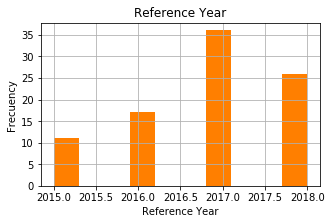

|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 2.318888888888889                |
|  1 | Median             | 1.85                             |
|  2 | Mode               | 0    1.3                         |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 2.708824300068058                |
|  4 | Min                | -5.2                             |
|  5 | Max                | 10.0                             |
|  6 | Quantile           | 0.25    0.425                    |
|    |                    | 0.50    1.850                    |
|    |                    | 0.75    3.975                    |
|    |                    | Name: Bottom 40%, dtype: float64 |


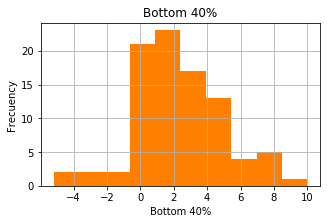

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 1.9866666666666668                     |
|  1 | Median             | 1.6                                    |
|  2 | Mode               | 0    1.5                               |
|    |                    | 1    1.7                               |
|    |                    | 2    4.3                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 2.4383730070168332                     |
|  4 | Min                | -3.5                                   |
|  5 | Max                | 10.0                                   |
|  6 | Quantile           | 0.25    0.525                          |
|    |                    | 0.50    1.600                          |
|    |                    | 0.75    3.250                          |
|    |                    | Name: 

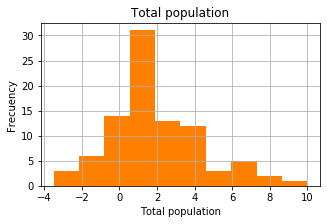

In [74]:
for col in annualized_growth_consumption.columns: 
        if col != 'Country':
            series = to_float(annualized_growth_consumption[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Mean consumption or income per capita

In [75]:
mean_consumption_income= pd.read_csv(path_data + 'mean_consumption_income.tsv', sep='\t')

In [76]:
mean_consumption_income

,Country,Reference Year,Most recen year,Bottom 40% (Baseline),Bottom 40% (Recent),Total population (Baseline),Total population (Recent)
0,Afghanistan,..,..,..,..,..,..
1,Albania,2014,2017,3.7,3.9,7.9,8.1
2,Algeria,..,..,..,..,..,..
3,American Samoa,..,..,..,..,..,..
4,Andorra,..,..,..,..,..,..
...,...,...,...,...,...,...,...
211,Virgin Islands (U.S.),..,..,..,..,..,..
212,West Bank and Gaza,2011,2016,5.3,5,10.8,10.5
213,"Yemen, Rep.",..,..,..,..,..,..
214,Zambia,2010,2015,0.7,0.7,2.6,3


In [77]:
mean_consumption_income = dropna(mean_consumption_income)

Original shape (216, 7)
After dropna (216, 7)
After drop ".." (90, 7)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 2011.9222222222222                   |
|  1 | Median             | 2012.0                               |
|  2 | Mode               | 0    2012.0                          |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 1.134027106445129                    |
|  4 | Min                | 2009.0                               |
|  5 | Max                | 2014.0                               |
|  6 | Quantile           | 0.25    2011.0                       |
|    |                    | 0.50    2012.0                       |
|    |                    | 0.75    2013.0                       |
|    |                    | Name: Reference Year, dtype: float64 |


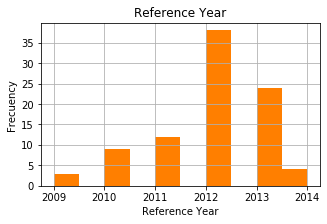

|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | 2016.8555555555556                    |
|  1 | Median             | 2017.0                                |
|  2 | Mode               | 0    2017.0                           |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 0.9779721177881481                    |
|  4 | Min                | 2015.0                                |
|  5 | Max                | 2018.0                                |
|  6 | Quantile           | 0.25    2016.0                        |
|    |                    | 0.50    2017.0                        |
|    |                    | 0.75    2018.0                        |
|    |                    | Name: Most recen year, dtype: float64 |


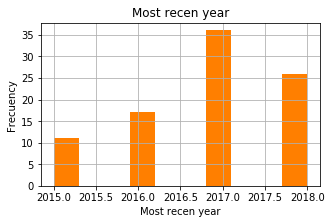

|    | Statistical        | Value                                       |
|---:|:-------------------|:--------------------------------------------|
|  0 | Mean               | 9.924444444444442                           |
|  1 | Median             | 5.65                                        |
|  2 | Mode               | 0    3.9                                    |
|    |                    | dtype: float64                              |
|  3 | Standard deviation | 9.644574781793029                           |
|  4 | Min                | 0.7                                         |
|  5 | Max                | 39.0                                        |
|  6 | Quantile           | 0.25     3.325                              |
|    |                    | 0.50     5.650                              |
|    |                    | 0.75    11.925                              |
|    |                    | Name: Bottom 40% (Baseline), dtype: float64 |


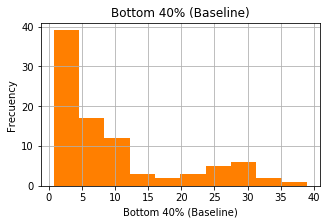

|    | Statistical        | Value                                     |
|---:|:-------------------|:------------------------------------------|
|  0 | Mean               | 10.976666666666668                        |
|  1 | Median             | 6.35                                      |
|  2 | Mode               | 0    1.5                                  |
|    |                    | 1    4.8                                  |
|    |                    | 2    5.4                                  |
|    |                    | dtype: float64                            |
|  3 | Standard deviation | 10.274601061174693                        |
|  4 | Min                | 0.7                                       |
|  5 | Max                | 39.9                                      |
|  6 | Quantile           | 0.25     3.575                            |
|    |                    | 0.50     6.350                            |
|    |                    | 0.75    14.600                      

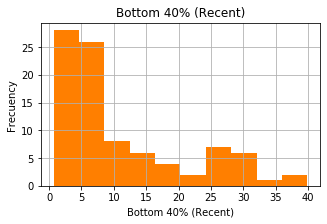

|    | Statistical        | Value                                             |
|---:|:-------------------|:--------------------------------------------------|
|  0 | Mean               | 20.72444444444444                                 |
|  1 | Median             | 14.149999999999999                                |
|  2 | Mode               | 0    2.6                                          |
|    |                    | dtype: float64                                    |
|  3 | Standard deviation | 17.66798228441768                                 |
|  4 | Min                | 1.8                                               |
|  5 | Max                | 70.9                                              |
|  6 | Quantile           | 0.25     7.825                                    |
|    |                    | 0.50    14.150                                    |
|    |                    | 0.75    25.400                                    |
|    |                    | Name: Total 

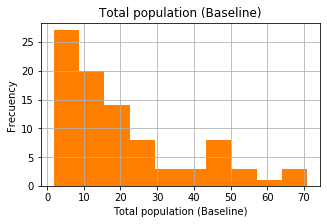

|    | Statistical        | Value                                           |
|---:|:-------------------|:------------------------------------------------|
|  0 | Mean               | 22.761111111111113                              |
|  1 | Median             | 15.05                                           |
|  2 | Mode               | 0     2.7                                       |
|    |                    | 1    13.8                                       |
|    |                    | dtype: float64                                  |
|  3 | Standard deviation | 19.204187830060263                              |
|  4 | Min                | 2.0                                             |
|  5 | Max                | 84.8                                            |
|  6 | Quantile           | 0.25     8.725                                  |
|    |                    | 0.50    15.050                                  |
|    |                    | 0.75    29.725                      

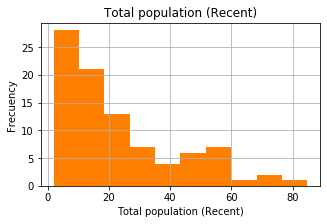

In [81]:
for col in mean_consumption_income.columns: 
        if col != 'Country':
            series = to_float(mean_consumption_income[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Adjusted net national income Growth

In [83]:
data = pd.read_csv(path_data + 'adjusted_net_national_income_growth.tsv', sep='\t')

In [84]:
data

,Country,% Avg (2000-2018),%vg (2017-2018)
0,Afghanistan,..,..
1,Albania,..,..
2,Algeria,5.4,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,4.8,2.1
222,Low income,..,..
223,Lower middle income,6.1,5.1
224,Upper middle income,6.5,4.7


In [85]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (138, 3)


|    | Statistical        | Value                                   |
|---:|:-------------------|:----------------------------------------|
|  0 | Mean               | 4.023188405797101                       |
|  1 | Median             | 3.95                                    |
|  2 | Mode               | 0    3.2                                |
|    |                    | dtype: float64                          |
|  3 | Standard deviation | 2.4359620127883383                      |
|  4 | Min                | -1.1                                    |
|  5 | Max                | 13.2                                    |
|  6 | Quantile           | 0.25    2.10                            |
|    |                    | 0.50    3.95                            |
|    |                    | 0.75    5.20                            |
|    |                    | Name: % Avg (2000-2018), dtype: float64 |


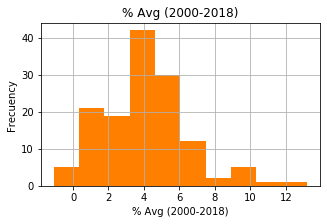

|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | 3.171739130434783                     |
|  1 | Median             | 3.0                                   |
|  2 | Mode               | 0    1.0                              |
|    |                    | 1    1.2                              |
|    |                    | 2    3.5                              |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 5.737353457002142                     |
|  4 | Min                | -32.8                                 |
|  5 | Max                | 36.1                                  |
|  6 | Quantile           | 0.25    1.025                         |
|    |                    | 0.50    3.000                         |
|    |                    | 0.75    5.475                         |
|    |                    | Name: %vg (2017-2018

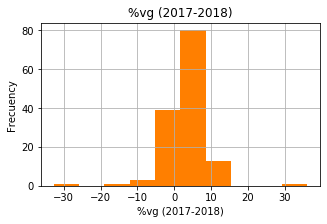

In [86]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

_____
_____
_____
_____
# Poverty


## Population below national poverty lines

In [93]:
data = pd.read_csv(path_data + 'population_below_poverty.tsv', sep='\t')

In [94]:
data

,Country,Reference Year,%
0,Afghanistan,2016,54.5
1,Albania,2012,14.3
2,Algeria,2011,5.5
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
211,Virgin Islands (U.S.),..,..
212,West Bank and Gaza,2016,29.2
213,"Yemen, Rep.",2014,48.6
214,Zambia,2015,54.4


In [95]:
data = dropna(data)

Original shape (216, 3)
After dropna (216, 3)
After drop ".." (136, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 2014.25                              |
|  1 | Median             | 2015.0                               |
|  2 | Mode               | 0    2018.0                          |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 3.616321028030805                    |
|  4 | Min                | 1993.0                               |
|  5 | Max                | 2019.0                               |
|  6 | Quantile           | 0.25    2012.0                       |
|    |                    | 0.50    2015.0                       |
|    |                    | 0.75    2017.0                       |
|    |                    | Name: Reference Year, dtype: float64 |


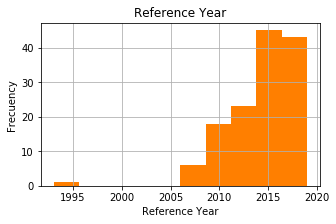

|    | Statistical        | Value                   |
|---:|:-------------------|:------------------------|
|  0 | Mean               | 30.2375                 |
|  1 | Median             | 24.85                   |
|  2 | Mode               | 0    24.3               |
|    |                    | dtype: float64          |
|  3 | Standard deviation | 18.16995051869575       |
|  4 | Min                | 0.4                     |
|  5 | Max                | 82.3                    |
|  6 | Quantile           | 0.25    17.675          |
|    |                    | 0.50    24.850          |
|    |                    | 0.75    41.825          |
|    |                    | Name: %, dtype: float64 |


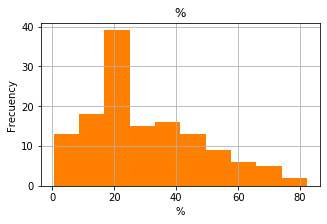

In [96]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## International poverty lines

In [97]:
data = pd.read_csv(path_data + 'international_poverty_lines.tsv', sep='\t')

In [98]:
data

,Country,Reference Year,Population below $1.90 a day,Population below $3.20 a day,Population below $5.50 a day
0,Afghanistan,..,..,..,..
1,Albania,2017,1.7,10.4,38
2,Algeria,2011,0.5,3.9,29.2
3,American Samoa,..,..,..,..
4,Andorra,..,..,..,..
...,...,...,...,...,...
211,Virgin Islands (U.S.),..,..,..,..
212,West Bank and Gaza,2016,1,5,23.6
213,"Yemen, Rep.",2014,18.8,52.2,81.6
214,Zambia,2015,57.5,74.3,87.2


In [99]:
data = dropna(data)

Original shape (216, 5)
After dropna (216, 5)
After drop ".." (165, 5)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 2014.3939393939395                   |
|  1 | Median             | 2016.0                               |
|  2 | Mode               | 0    2017.0                          |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 4.4113171664080095                   |
|  4 | Min                | 1992.0                               |
|  5 | Max                | 2018.0                               |
|  6 | Quantile           | 0.25    2013.0                       |
|    |                    | 0.50    2016.0                       |
|    |                    | 0.75    2017.0                       |
|    |                    | Name: Reference Year, dtype: float64 |


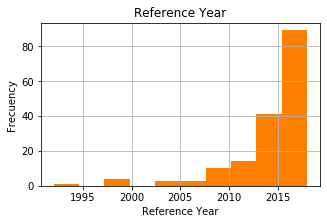

|    | Statistical        | Value                                              |
|---:|:-------------------|:---------------------------------------------------|
|  0 | Mean               | 13.7                                               |
|  1 | Median             | 2.5                                                |
|  2 | Mode               | 0    0.0                                           |
|    |                    | dtype: float64                                     |
|  3 | Standard deviation | 19.923919317634514                                 |
|  4 | Min                | 0.0                                                |
|  5 | Max                | 77.6                                               |
|  6 | Quantile           | 0.25     0.3                                       |
|    |                    | 0.50     2.5                                       |
|    |                    | 0.75    21.2                                       |
|    |                    | 

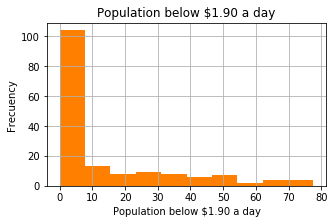

|    | Statistical        | Value                                              |
|---:|:-------------------|:---------------------------------------------------|
|  0 | Mean               | 25.76606060606062                                  |
|  1 | Median             | 10.6                                               |
|  2 | Mode               | 0    0.0                                           |
|    |                    | dtype: float64                                     |
|  3 | Standard deviation | 29.25792053896855                                  |
|  4 | Min                | 0.0                                                |
|  5 | Max                | 91.0                                               |
|  6 | Quantile           | 0.25     1.2                                       |
|    |                    | 0.50    10.6                                       |
|    |                    | 0.75    49.9                                       |
|    |                    | 

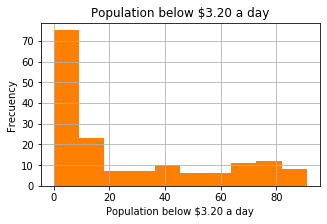

|    | Statistical        | Value                                              |
|---:|:-------------------|:---------------------------------------------------|
|  0 | Mean               | 40.81939393939395                                  |
|  1 | Median             | 32.2                                               |
|  2 | Mode               | 0    0.1                                           |
|    |                    | dtype: float64                                     |
|  3 | Standard deviation | 35.15457659719444                                  |
|  4 | Min                | 0.0                                                |
|  5 | Max                | 97.7                                               |
|  6 | Quantile           | 0.25     3.9                                       |
|    |                    | 0.50    32.2                                       |
|    |                    | 0.75    78.4                                       |
|    |                    | 

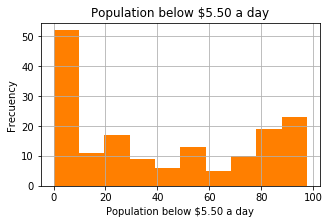

In [100]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

_______
_________
_______
______
# Women leadership

## Women in parliaments

In [101]:
data = pd.read_csv(path_data + 'women_parliaments.tsv', sep='\t')

In [102]:
data

,Country,Total
0,Afghanistan,28
1,Albania,30
2,Algeria,26
3,American Samoa,..
4,Andorra,46
...,...,...
224,Sub-Saharan Africa,24
225,Low income,22
226,Lower middle income,21
227,Upper middle income,25


In [103]:
data = dropna(data)

Original shape (229, 2)
After dropna (229, 2)
After drop ".." (205, 2)


|    | Statistical        | Value                       |
|---:|:-------------------|:----------------------------|
|  0 | Mean               | 22.88780487804878           |
|  1 | Median             | 21.0                        |
|  2 | Mode               | 0    21.0                   |
|    |                    | dtype: float64              |
|  3 | Standard deviation | 11.998043041449964          |
|  4 | Min                | 0.0                         |
|  5 | Max                | 61.0                        |
|  6 | Quantile           | 0.25    15.0                |
|    |                    | 0.50    21.0                |
|    |                    | 0.75    30.0                |
|    |                    | Name: Total, dtype: float64 |


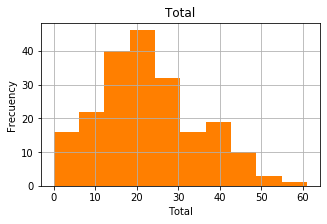

In [104]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Women Business and the Law Index Score

In [105]:
data = pd.read_csv(path_data + 'women_business_law.tsv', sep='\t')

In [106]:
data

,Country,Total
0,Afghanistan,38.1
1,Albania,91.3
2,Algeria,57.5
3,American Samoa,..
4,Andorra,..
...,...,...
224,Sub-Saharan Africa,..
225,Low income,..
226,Lower middle income,..
227,Upper middle income,..


In [107]:
data = dropna(data)

Original shape (229, 2)
After dropna (229, 2)
After drop ".." (189, 2)


|    | Statistical        | Value                       |
|---:|:-------------------|:----------------------------|
|  0 | Mean               | 75.16137566137556           |
|  1 | Median             | 78.8                        |
|  2 | Mode               | 0    97.5                   |
|    |                    | dtype: float64              |
|  3 | Standard deviation | 17.319253221199894          |
|  4 | Min                | 26.3                        |
|  5 | Max                | 100.0                       |
|  6 | Quantile           | 0.25    65.0                |
|    |                    | 0.50    78.8                |
|    |                    | 0.75    86.9                |
|    |                    | Name: Total, dtype: float64 |


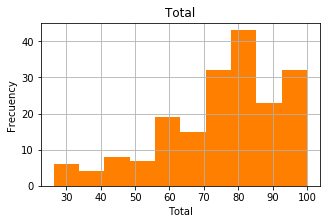

In [108]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
___
# International flights

## International tourists: Inbound

In [122]:
data = pd.read_csv(path_data + 'international_tourists_inbound.tsv', sep='\t')

In [123]:
data

,Country,Visitors (2012),Visitors (2018)
0,Afghanistan,NaN,NaN
1,Albania,3.156,5.340
2,Algeria,2.634,2.657
3,American Samoa,23,20
4,Andorra,2.238,3.042
...,...,...,...
221,Sub-Saharan Africa,39.172,NaN
222,Low income,NaN,NaN
223,Lower middle income,104.683,143.896
224,Upper middle income,291.432,384.264


In [124]:
data = dropna(data)

Original shape (226, 3)
After dropna (181, 3)
After drop ".." (181, 3)


|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | 22971.408839779004                    |
|  1 | Median             | 1606.0                                |
|  2 | Mode               | 0       5.0                           |
|    |                    | 1      23.0                           |
|    |                    | 2     256.0                           |
|    |                    | 3     292.0                           |
|    |                    | 4    1986.0                           |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 104326.21959176753                    |
|  4 | Min                | 1.0                                   |
|  5 | Max                | 1070183.0                             |
|  6 | Quantile           | 0.25     349.0                        |
|    |                    | 0.50    1606.0      

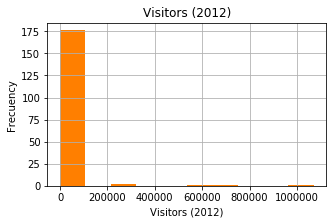

|    | Statistical        | Value                                 |
|---:|:-------------------|:--------------------------------------|
|  0 | Mean               | 30979.13259668508                     |
|  1 | Median             | 2535.0                                |
|  2 | Mode               | 0       7.0                           |
|    |                    | 1    1173.0                           |
|    |                    | dtype: float64                        |
|  3 | Standard deviation | 140293.91755344716                    |
|  4 | Min                | 3.0                                   |
|  5 | Max                | 1441953.0                             |
|  6 | Quantile           | 0.25      463.0                       |
|    |                    | 0.50     2535.0                       |
|    |                    | 0.75    11196.0                       |
|    |                    | Name: Visitors (2018), dtype: float64 |


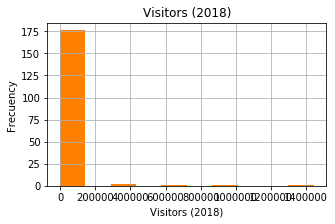

In [125]:
for col in data.columns: 
        if col != 'Country':
            series = to_float_dot(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## International tourists: Outbound

In [131]:
data = pd.read_csv(path_data + 'international_tourists_outbound.tsv', sep='\t')

In [133]:
data

,Country,Departures (2012),Departures (2018)
0,Afghanistan,NaN,NaN
1,Albania,3.959,5.415
2,Algeria,1.911,5.610
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
...,...,...,...
221,Sub-Saharan Africa,NaN,NaN
222,Low income,NaN,NaN
223,Lower middle income,97.448,150.489
224,Upper middle income,237.478,338.851


In [134]:
data = dropna(data)

Original shape (226, 3)
After dropna (98, 3)
After drop ".." (98, 3)


|    | Statistical        | Value                                   |
|---:|:-------------------|:----------------------------------------|
|  0 | Mean               | 40433.0918367347                        |
|  1 | Median             | 3395.0                                  |
|  2 | Mode               | 0          15.0                         |
|    |                    | 1          23.0                         |
|    |                    | 2          45.0                         |
|    |                    | 3          56.0                         |
|    |                    | 4          83.0                         |
|    |                    |         ...                             |
|    |                    | 93     237478.0                         |
|    |                    | 94     285484.0                         |
|    |                    | 95     492713.0                         |
|    |                    | 96     641184.0                         |
|    |              

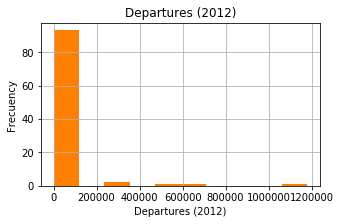

|    | Statistical        | Value                                   |
|---:|:-------------------|:----------------------------------------|
|  0 | Mean               | 53721.86734693877                       |
|  1 | Median             | 5512.5                                  |
|  2 | Mode               | 0          29.0                         |
|    |                    | 1          31.0                         |
|    |                    | 2          47.0                         |
|    |                    | 3          64.0                         |
|    |                    | 4          72.0                         |
|    |                    |         ...                             |
|    |                    | 93     338851.0                         |
|    |                    | 94     415030.0                         |
|    |                    | 95     618356.0                         |
|    |                    | 96     814281.0                         |
|    |              

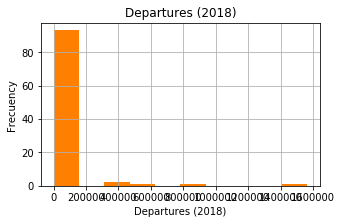

In [135]:
for col in data.columns: 
        if col != 'Country':
            series = to_float_dot(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
____
___
___
# Imports/Exports

## Growth of merchandise trade: Export volume

In [136]:
data = pd.read_csv(path_data + 'merchandise_trade_export_volume.tsv', sep='\t')

In [137]:
data

,Country,Volume
0,Afghanistan,-0.7
1,Albania,8
2,Algeria,-3.3
3,American Samoa,-2.4
4,Andorra,-4.8
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,10.2
211,"Yemen, Rep.",-14.6
212,Zambia,7.4


In [138]:
data = dropna(data)

Original shape (214, 2)
After dropna (214, 2)
After drop ".." (199, 2)


|    | Statistical        | Value                        |
|---:|:-------------------|:-----------------------------|
|  0 | Mean               | 2.2648241206030173           |
|  1 | Median             | 2.3                          |
|  2 | Mode               | 0   -0.7                     |
|    |                    | 1   -0.2                     |
|    |                    | dtype: float64               |
|  3 | Standard deviation | 7.981972671052907            |
|  4 | Min                | -41.7                        |
|  5 | Max                | 60.1                         |
|  6 | Quantile           | 0.25   -0.70                 |
|    |                    | 0.50    2.30                 |
|    |                    | 0.75    5.25                 |
|    |                    | Name: Volume, dtype: float64 |


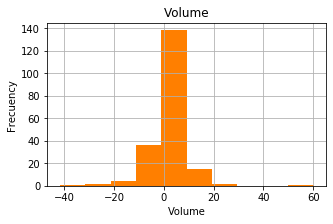

In [139]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Growth of merchandise trade: Import volume

In [140]:
data = pd.read_csv(path_data + 'merchandise_trade_import_volume.tsv', sep='\t')

In [141]:
data

,Country,Volume
0,Afghanistan,11
1,Albania,0.9
2,Algeria,10.1
3,American Samoa,-1
4,Andorra,..
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,6.8
211,"Yemen, Rep.",-0.8
212,Zambia,9.5


In [142]:
data = dropna(data)

Original shape (214, 2)
After dropna (214, 2)
After drop ".." (198, 2)


|    | Statistical        | Value                        |
|---:|:-------------------|:-----------------------------|
|  0 | Mean               | 3.156565656565657            |
|  1 | Median             | 3.25                         |
|  2 | Mode               | 0    1.4                     |
|    |                    | dtype: float64               |
|  3 | Standard deviation | 4.769800549548099            |
|  4 | Min                | -16.7                        |
|  5 | Max                | 19.9                         |
|  6 | Quantile           | 0.25    0.40                 |
|    |                    | 0.50    3.25                 |
|    |                    | 0.75    5.90                 |
|    |                    | Name: Volume, dtype: float64 |


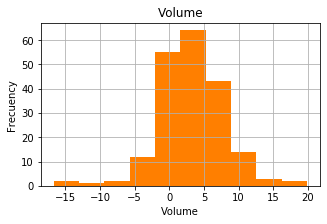

In [143]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Growth of merchandise trade: Export value

In [278]:
data = pd.read_csv(path_data + 'merchandise_trade_export_value.tsv', sep='\t')

In [279]:
data

,Country,Value
0,Afghanistan,3.2
1,Albania,9.8
2,Algeria,-4.5
3,American Samoa,-0.1
4,Andorra,-4.9
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,12.2
211,"Yemen, Rep.",-13.3
212,Zambia,7.6


In [280]:
data = dropna(data)

Original shape (214, 2)
After dropna (214, 2)
After drop ".." (199, 2)


|    | Statistical        | Value                       |
|---:|:-------------------|:----------------------------|
|  0 | Mean               | 3.7020100502512565          |
|  1 | Median             | 3.6                         |
|  2 | Mode               | 0    0.9                    |
|    |                    | dtype: float64              |
|  3 | Standard deviation | 8.358404466895685           |
|  4 | Min                | -40.2                       |
|  5 | Max                | 64.6                        |
|  6 | Quantile           | 0.25    0.60                |
|    |                    | 0.50    3.60                |
|    |                    | 0.75    7.15                |
|    |                    | Name: Value, dtype: float64 |


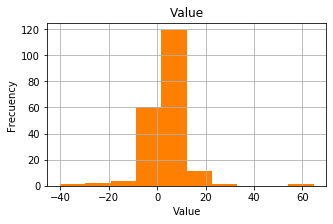

In [281]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Growth of merchandise trade: Import value

In [282]:
data = pd.read_csv(path_data + 'merchandise_trade_import_value.tsv', sep='\t')

In [283]:
data

,Country,Value
0,Afghanistan,12.9
1,Albania,2.2
2,Algeria,8
3,American Samoa,2.4
4,Andorra,-3.5
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,7.8
211,"Yemen, Rep.",1.3
212,Zambia,11


In [284]:
data = dropna(data)

Original shape (214, 2)
After dropna (214, 2)
After drop ".." (199, 2)


|    | Statistical        | Value                       |
|---:|:-------------------|:----------------------------|
|  0 | Mean               | 4.386432160804021           |
|  1 | Median             | 4.2                         |
|  2 | Mode               | 0    5.8                    |
|    |                    | 1    8.0                    |
|    |                    | dtype: float64              |
|  3 | Standard deviation | 4.849540937784037           |
|  4 | Min                | -15.1                       |
|  5 | Max                | 22.7                        |
|  6 | Quantile           | 0.25    1.25                |
|    |                    | 0.50    4.20                |
|    |                    | 0.75    7.60                |
|    |                    | Name: Value, dtype: float64 |


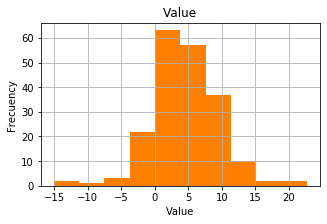

In [285]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Growth of merchandise trade: Net barter terms of trade index

In [286]:
data = pd.read_csv(path_data + 'net_terms_trade_index.tsv', sep='\t')

In [287]:
data

,Country,Net barter
0,Afghanistan,163.5
1,Albania,93.4
2,Algeria,155.4
3,American Samoa,173.2
4,Andorra,..
...,...,...
209,Virgin Islands (U.S.),..
210,West Bank and Gaza,88.5
211,"Yemen, Rep.",131.5
212,Zambia,164.8


In [288]:
data = dropna(data)

Original shape (214, 2)
After dropna (214, 2)
After drop ".." (198, 2)


|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 114.54999999999994               |
|  1 | Median             | 109.55                           |
|  2 | Mode               | 0     88.5                       |
|    |                    | 1    109.7                       |
|    |                    | dtype: float64                   |
|  3 | Standard deviation | 30.723388055422227               |
|  4 | Min                | 52.4                             |
|  5 | Max                | 249.7                            |
|  6 | Quantile           | 0.25     93.475                  |
|    |                    | 0.50    109.550                  |
|    |                    | 0.75    129.250                  |
|    |                    | Name: Net barter, dtype: float64 |


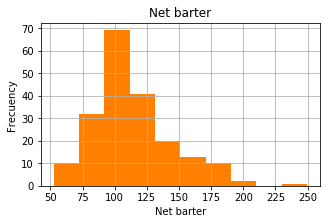

In [289]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Exports: To low- and middle-income economies, Within region

In [291]:
data = pd.read_csv(path_data + 'exports_low_income_within_region.tsv', sep='\t')

In [292]:
data

,Country,Exports (2007),Exports (2017)
0,East Asia & Pacific (excluding high income),10.6,16.4
1,American Samoa,22.2,18.2
2,Cambodia,3.6,14.5
3,China,5.5,10.8
4,Fiji,16,24.6
...,...,...,...
144,Tanzania,30.3,37
145,Togo,53.8,68.7
146,Uganda,44.1,49.7
147,Zambia,24.1,19.2


In [293]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (141, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 25.11843971631207                    |
|  1 | Median             | 20.5                                 |
|  2 | Mode               | 0     1.7                            |
|    |                    | 1     2.7                            |
|    |                    | 2    35.9                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 20.970947941095222                   |
|  4 | Min                | 0.0                                  |
|  5 | Max                | 84.3                                 |
|  6 | Quantile           | 0.25     9.0                         |
|    |                    | 0.50    20.5                         |
|    |                    | 0.75    35.9                         |
|    |                    | Name: Exports (2007), dtype: float

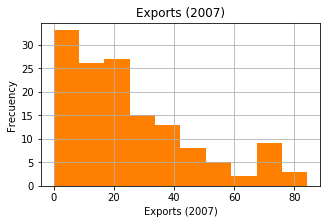

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 26.665957446808513                   |
|  1 | Median             | 20.9                                 |
|  2 | Mode               | 0      5.1                           |
|    |                    | 1      6.9                           |
|    |                    | 2     10.3                           |
|    |                    | 3     13.1                           |
|    |                    | 4     16.0                           |
|    |                    | 5     16.4                           |
|    |                    | 6     19.4                           |
|    |                    | 7     20.5                           |
|    |                    | 8     20.9                           |
|    |                    | 9     21.4                           |
|    |                    | 10    22.1                        

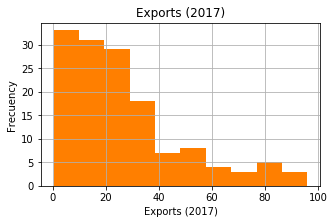

In [294]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Exports: To low- and middle-income economies, Outside region

In [295]:
data = pd.read_csv(path_data + 'exports_low_income_outside_region.tsv', sep='\t')

In [296]:
data

,Country,Exports (2007),Exports (2017)
0,East Asia & Pacific (excluding high income),13.4,16.9
1,American Samoa,32.3,35.3
2,Cambodia,1.1,2.6
3,China,15.3,19.3
4,Fiji,1.2,2.5
...,...,...,...
144,Tanzania,15.9,38.0
145,Togo,18.9,14.7
146,Uganda,3.4,7.8
147,Zambia,18.4,18.3


In [297]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (148, 3)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 14.472972972972975                   |
|  1 | Median             | 9.95                                 |
|  2 | Mode               | 0    1.2                             |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 16.03342000596566                    |
|  4 | Min                | 0.2                                  |
|  5 | Max                | 74.9                                 |
|  6 | Quantile           | 0.25     3.375                       |
|    |                    | 0.50     9.950                       |
|    |                    | 0.75    18.175                       |
|    |                    | Name: Exports (2007), dtype: float64 |


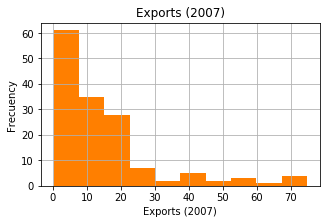

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 20.4                                 |
|  1 | Median             | 15.850000000000001                   |
|  2 | Mode               | 0    14.7                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 18.36676234897358                    |
|  4 | Min                | 0.1                                  |
|  5 | Max                | 89.4                                 |
|  6 | Quantile           | 0.25     5.500                       |
|    |                    | 0.50    15.850                       |
|    |                    | 0.75    30.025                       |
|    |                    | Name: Exports (2017), dtype: float64 |


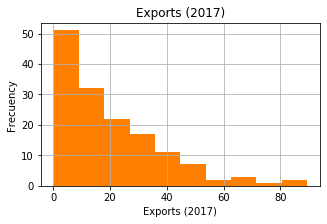

In [301]:
for col in data.columns: 
        if col != 'Country':
            if col != 'Exports (2017)':
                series = to_float(data[col])
            else:
                series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Exports: To high-income economies

In [302]:
data = pd.read_csv(path_data + 'exports_high_income.tsv', sep='\t')

In [303]:
data

,Country,Exports (2007),Exports (2017)
0,East Asia & Pacific (excluding high income),75.9,66.5
1,American Samoa,45.5,46.5
2,Cambodia,95.2,82.5
3,China,79.2,69.9
4,Fiji,82.9,72.9
...,...,...,...
144,Tanzania,53.2,24.8
145,Togo,7.3,16.6
146,Uganda,49.7,39.8
147,Zambia,57.5,59.8


In [304]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (149, 3)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 59.71543624161075                    |
|  1 | Median             | 64.6                                 |
|  2 | Mode               | 0    79.0                            |
|    |                    | 1    95.2                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 23.374797946322023                   |
|  4 | Min                | 5.3                                  |
|  5 | Max                | 98.0                                 |
|  6 | Quantile           | 0.25    43.7                         |
|    |                    | 0.50    64.6                         |
|    |                    | 0.75    76.8                         |
|    |                    | Name: Exports (2007), dtype: float64 |


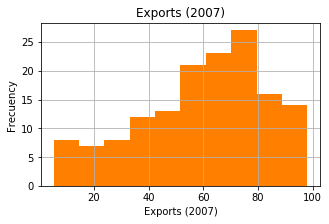

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 52.65234899328862                    |
|  1 | Median             | 56.3                                 |
|  2 | Mode               | 0     13.5                           |
|    |                    | 1     25.3                           |
|    |                    | 2     29.4                           |
|    |                    | 3     30.3                           |
|    |                    | 4     43.2                           |
|    |                    | 5     52.0                           |
|    |                    | 6     57.8                           |
|    |                    | 7     58.2                           |
|    |                    | 8     64.3                           |
|    |                    | 9     69.9                           |
|    |                    | 10    78.5                        

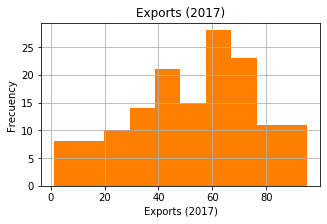

In [306]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Imports: To low- and middle-income economies, Within region

In [307]:
data = pd.read_csv(path_data + 'imports_low_income_within_region.tsv', sep='\t')

In [308]:
data

,Country,Imports (2007),Imports (2017)
0,East Asia & Pacific (excluding high income),15.6,20.4
1,American Samoa,18.9,17.3
2,Cambodia,47.7,61
3,China,9.7,11.5
4,Fiji,8.7,22.3
...,...,...,...
144,Tanzania,13.1,6.2
145,Togo,14.3,15.6
146,Uganda,22.2,15.6
147,Zambia,59.1,58.7


In [309]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (141, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 26.268085106382962                   |
|  1 | Median             | 21.4                                 |
|  2 | Mode               | 0     1.9                            |
|    |                    | 1     9.7                            |
|    |                    | 2    15.6                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 20.483178879785154                   |
|  4 | Min                | 0.0                                  |
|  5 | Max                | 93.9                                 |
|  6 | Quantile           | 0.25     9.7                         |
|    |                    | 0.50    21.4                         |
|    |                    | 0.75    35.2                         |
|    |                    | Name: Imports (2007), dtype: float

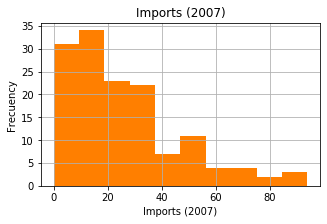

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 25.915602836879433                   |
|  1 | Median             | 20.4                                 |
|  2 | Mode               | 0    15.6                            |
|    |                    | 1    17.3                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 20.52631510903553                    |
|  4 | Min                | 0.3                                  |
|  5 | Max                | 94.1                                 |
|  6 | Quantile           | 0.25    10.5                         |
|    |                    | 0.50    20.4                         |
|    |                    | 0.75    36.2                         |
|    |                    | Name: Imports (2017), dtype: float64 |


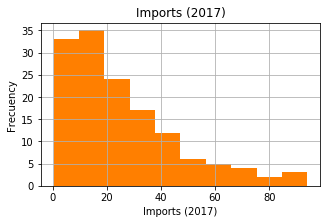

In [310]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Imports: To low- and middle-income economies, Outside region

In [312]:
data = pd.read_csv(path_data + 'imports_low_income_outside_region.tsv', sep='\t')

In [313]:
data

,Country,Imports (2007),Imports (2017)
0,East Asia & Pacific (excluding high income),11.7,13.1
1,American Samoa,2.0,7.8
2,Cambodia,1.8,1.2
3,China,14.4,16.1
4,Fiji,2.8,3.4
...,...,...,...
144,Tanzania,27.8,34.2
145,Togo,26.9,38.5
146,Uganda,25.8,44.2
147,Zambia,11.6,17.4


In [314]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (149, 3)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 17.418120805369124                   |
|  1 | Median             | 15.2                                 |
|  2 | Mode               | 0     5.0                            |
|    |                    | 1    18.0                            |
|    |                    | 2    27.2                            |
|    |                    | 3    27.4                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 12.562793918526307                   |
|  4 | Min                | 0.1                                  |
|  5 | Max                | 74.6                                 |
|  6 | Quantile           | 0.25     7.5                         |
|    |                    | 0.50    15.2                         |
|    |                    | 0.75    25.8                      

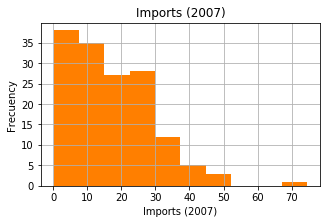

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 24.21006711409396                    |
|  1 | Median             | 24.4                                 |
|  2 | Mode               | 0    18.1                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 15.1999721948823                     |
|  4 | Min                | 0.5                                  |
|  5 | Max                | 69.4                                 |
|  6 | Quantile           | 0.25    12.4                         |
|    |                    | 0.50    24.4                         |
|    |                    | 0.75    33.4                         |
|    |                    | Name: Imports (2017), dtype: float64 |


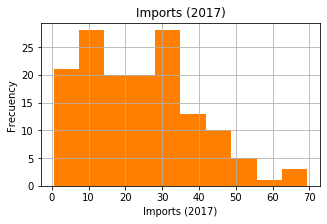

In [316]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Imports: To high-income economies

In [317]:
data = pd.read_csv(path_data + 'imports_high_income.tsv', sep='\t')

In [318]:
data

,Country,Imports (2007),Imports (2017)
0,East Asia & Pacific (excluding high income),66.5,60.9
1,American Samoa,79.1,74.9
2,Cambodia,50.4,32.7
3,China,66.8,65.1
4,Fiji,87.0,72.0
...,...,...,...
144,Tanzania,58.7,59.0
145,Togo,55.8,45.9
146,Uganda,52.0,39.3
147,Zambia,29.3,23.8


In [319]:
data = dropna(data)

Original shape (149, 3)
After dropna (149, 3)
After drop ".." (149, 3)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 54.910738255033564                   |
|  1 | Median             | 56.3                                 |
|  2 | Mode               | 0    43.0                            |
|    |                    | 1    51.9                            |
|    |                    | 2    53.8                            |
|    |                    | 3    55.1                            |
|    |                    | 4    58.9                            |
|    |                    | 5    59.6                            |
|    |                    | 6    59.7                            |
|    |                    | 7    79.1                            |
|    |                    | 8    80.3                            |
|    |                    | 9    89.0                            |
|    |                    | dtype: float64                    

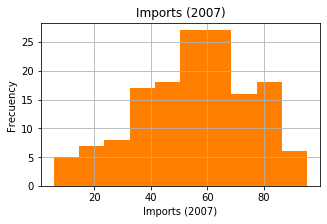

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 48.72751677852347                    |
|  1 | Median             | 50.1                                 |
|  2 | Mode               | 0     32.7                           |
|    |                    | 1     35.0                           |
|    |                    | 2     36.7                           |
|    |                    | 3     37.9                           |
|    |                    | 4     45.8                           |
|    |                    | 5     49.4                           |
|    |                    | 6     54.7                           |
|    |                    | 7     56.6                           |
|    |                    | 8     57.7                           |
|    |                    | 9     60.6                           |
|    |                    | 10    60.9                        

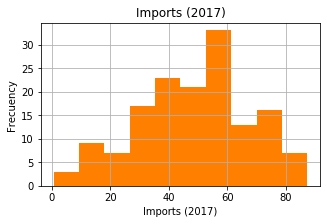

In [321]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Goods and services Exports

In [322]:
data = pd.read_csv(path_data + 'goods_services_exports.tsv', sep='\t')

In [323]:
data

,Country,Exports (2010),Exports (2019)
0,Afghanistan,2566,1509
1,Albania,3324,4815
2,Algeria,60588,37572
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,413063,439249
222,Low income,100163,..
223,Lower middle income,1045727,1565500
224,Upper middle income,4259310,5932902


In [324]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (186, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 393943.60752688174                   |
|  1 | Median             | 12182.5                              |
|  2 | Mode               | 0    325.0                           |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 1863857.6666737976                   |
|  4 | Min                | 19.0                                 |
|  5 | Max                | 18910070.0                           |
|  6 | Quantile           | 0.25     2021.0                      |
|    |                    | 0.50    12182.5                      |
|    |                    | 0.75    82574.5                      |
|    |                    | Name: Exports (2010), dtype: float64 |


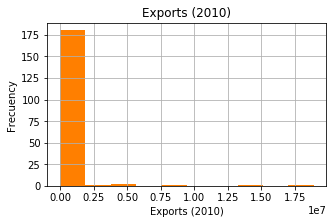

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 518811.79032258067                   |
|  1 | Median             | 18161.0                              |
|  2 | Mode               | 0            19.0                    |
|    |                    | 1            98.0                    |
|    |                    | 2           112.0                    |
|    |                    | 3           117.0                    |
|    |                    | 4           129.0                    |
|    |                    |           ...                        |
|    |                    | 181     5932902.0                    |
|    |                    | 182     7536083.0                    |
|    |                    | 183    10234431.0                    |
|    |                    | 184    17226868.0                    |
|    |                    | 185    24828684.0                 

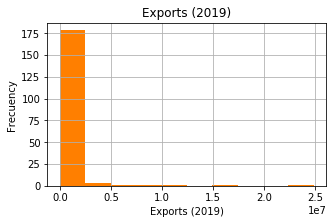

In [325]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Goods and services Imports

In [326]:
data = pd.read_csv(path_data + 'goods_services_imports.tsv', sep='\t')

In [327]:
data

,Country,Imports (2010),Imports (2019)
0,Afghanistan,5771,7371
1,Albania,5781,6907
2,Algeria,50645,60128
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,407124,480692
222,Low income,124154,173752
223,Lower middle income,1199877,1815767
224,Upper middle income,3824435,5484743


In [328]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (187, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 382426.17647058825                   |
|  1 | Median             | 13095.0                              |
|  2 | Mode               | 0           121.0                    |
|    |                    | 1           123.0                    |
|    |                    | 2           146.0                    |
|    |                    | 3           165.0                    |
|    |                    | 4           226.0                    |
|    |                    |           ...                        |
|    |                    | 182     3824435.0                    |
|    |                    | 183     4881109.0                    |
|    |                    | 184     7567701.0                    |
|    |                    | 185    13168605.0                    |
|    |                    | 186    18317446.0                 

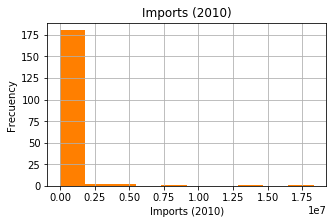

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 504074.7540106952                    |
|  1 | Median             | 19086.0                              |
|  2 | Mode               | 0           171.0                    |
|    |                    | 1           175.0                    |
|    |                    | 2           197.0                    |
|    |                    | 3           207.0                    |
|    |                    | 4           334.0                    |
|    |                    |           ...                        |
|    |                    | 182     5484743.0                    |
|    |                    | 183     7032735.0                    |
|    |                    | 184     9453759.0                    |
|    |                    | 185    16651721.0                    |
|    |                    | 186    24128612.0                 

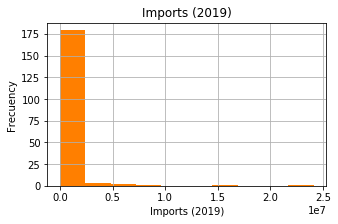

In [329]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Exports of goods and services

In [330]:
data = pd.read_csv(path_data + 'exports_goods_services.tsv', sep='\t')

In [331]:
data

,Country,Exports (2010),Exports (2019)
0,Afghanistan,16,8
1,Albania,28,32
2,Algeria,38,23
3,American Samoa,63,69
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,31,27
222,Low income,23,19
223,Lower middle income,28,26
224,Upper middle income,27,24


In [332]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (192, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 42.395833333333336                   |
|  1 | Median             | 33.0                                 |
|  2 | Mode               | 0    28.0                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 34.47754536477987                    |
|  4 | Min                | 9.0                                  |
|  5 | Max                | 298.0                                |
|  6 | Quantile           | 0.25    23.00                        |
|    |                    | 0.50    33.00                        |
|    |                    | 0.75    50.25                        |
|    |                    | Name: Exports (2010), dtype: float64 |


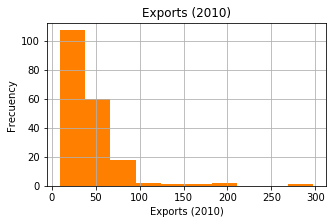

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 41.958333333333336                   |
|  1 | Median             | 36.0                                 |
|  2 | Mode               | 0    19.0                            |
|    |                    | 1    23.0                            |
|    |                    | 2    32.0                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 28.973508993314738                   |
|  4 | Min                | 3.0                                  |
|  5 | Max                | 209.0                                |
|  6 | Quantile           | 0.25    23.0                         |
|    |                    | 0.50    36.0                         |
|    |                    | 0.75    52.5                         |
|    |                    | Name: Exports (2019), dtype: float

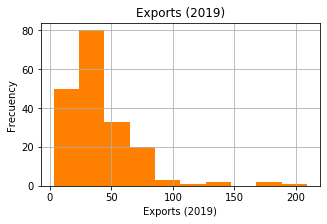

In [333]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Imports of goods and services

In [334]:
data = pd.read_csv(path_data + 'imports_goods_services.tsv', sep='\t')

In [335]:
data

,Country,Imports (2010),Imports (2019)
0,Afghanistan,36,38
1,Albania,49,45
2,Algeria,31,29
3,American Samoa,93,99
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,30,30
222,Low income,33,30
223,Lower middle income,31,31
224,Upper middle income,25,23


In [336]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (192, 3)


|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 48.786458333333336                   |
|  1 | Median             | 42.0                                 |
|  2 | Mode               | 0    28.0                            |
|    |                    | 1    31.0                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 32.128850924620295                   |
|  4 | Min                | 12.0                                 |
|  5 | Max                | 285.0                                |
|  6 | Quantile           | 0.25    30.0                         |
|    |                    | 0.50    42.0                         |
|    |                    | 0.75    60.0                         |
|    |                    | Name: Imports (2010), dtype: float64 |


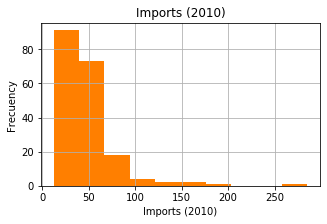

|    | Statistical        | Value                                |
|---:|:-------------------|:-------------------------------------|
|  0 | Mean               | 47.416666666666664                   |
|  1 | Median             | 42.0                                 |
|  2 | Mode               | 0    29.0                            |
|    |                    | dtype: float64                       |
|  3 | Standard deviation | 25.89332391535874                    |
|  4 | Min                | 12.0                                 |
|  5 | Max                | 176.0                                |
|  6 | Quantile           | 0.25    30.00                        |
|    |                    | 0.50    42.00                        |
|    |                    | 0.75    58.25                        |
|    |                    | Name: Imports (2019), dtype: float64 |


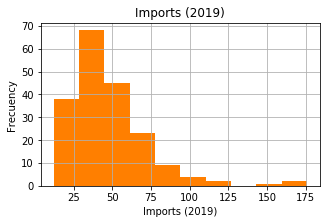

In [337]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

____
____
____
____
# Blood Type

## Blood type distribution


In [149]:
data = pd.read_csv(path_data + 'blood_type_distribution.tsv', sep='\t')

In [150]:
data

,Country,O+,A+,B+,AB+,O−,A−,B−,AB−
0,Albania,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Argentina,45.40,34.26,8.59,2.64,8.40,0.44,0.21,0.06
2,Armenia,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
3,Australia,40.00,31.00,8.00,2.00,9.00,7.00,2.00,1.00
4,Austria,30.00,37.00,12.00,5.00,6.00,7.00,2.00,1.00
...,...,...,...,...,...,...,...,...,...
105,United States,37.40,35.70,8.50,3.40,6.60,6.30,1.50,0.60
106,Venezuela,58.30,28.20,5.60,1.90,3.70,1.80,0.40,0.10
107,Vietnam,41.70,21.90,30.80,4.98,0.30,0.10,0.20,0.02
108,Yemen,47.84,27.50,15.32,2.14,3.66,2.10,1.17,0.16


In [151]:
data = dropna(data)

Original shape (110, 9)
After dropna (110, 9)
After drop ".." (110, 9)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 40.12627272727273        |
|  1 | Median             | 38.15                    |
|  2 | Mode               | 0    35.0                |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 10.047301418614706       |
|  4 | Min                | 26.63                    |
|  5 | Max                | 75.0                     |
|  6 | Quantile           | 0.25    32.00            |
|    |                    | 0.50    38.15            |
|    |                    | 0.75    46.45            |
|    |                    | Name: O+, dtype: float64 |


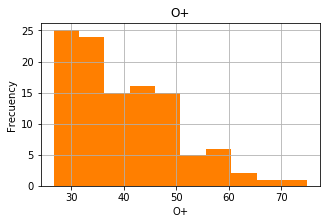

|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 30.239181818181816       |
|  1 | Median             | 30.6                     |
|  2 | Mode               | 0    37.0                |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 6.309390137849536        |
|  4 | Min                | 14.0                     |
|  5 | Max                | 46.3                     |
|  6 | Quantile           | 0.25    26.025           |
|    |                    | 0.50    30.600           |
|    |                    | 0.75    35.700           |
|    |                    | Name: A+, dtype: float64 |


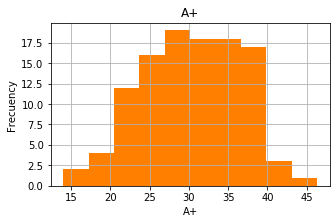

|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 15.750727272727275       |
|  1 | Median             | 14.4                     |
|  2 | Mode               | 0    9.0                 |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 7.57412564476822         |
|  4 | Min                | 5.6                      |
|  5 | Max                | 38.14                    |
|  6 | Quantile           | 0.25     9.125           |
|    |                    | 0.50    14.400           |
|    |                    | 0.75    20.700           |
|    |                    | Name: B+, dtype: float64 |


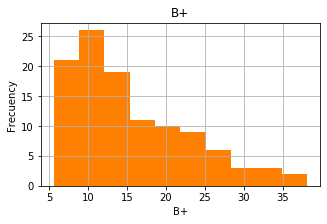

|    | Statistical        | Value                     |
|---:|:-------------------|:--------------------------|
|  0 | Mean               | 4.6898181818181826        |
|  1 | Median             | 4.2                       |
|  2 | Mode               | 0    3.0                  |
|    |                    | 1    4.0                  |
|    |                    | dtype: float64            |
|  3 | Standard deviation | 2.290677149120157         |
|  4 | Min                | 0.5                       |
|  5 | Max                | 11.32                     |
|  6 | Quantile           | 0.25    3.0               |
|    |                    | 0.50    4.2               |
|    |                    | 0.75    6.3               |
|    |                    | Name: AB+, dtype: float64 |


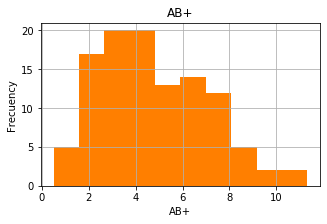

|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 3.945545454545456        |
|  1 | Median             | 4.0                      |
|  2 | Mode               | 0    5.0                 |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 2.516175044728226        |
|  4 | Min                | 0.08                     |
|  5 | Max                | 9.0                      |
|  6 | Quantile           | 0.25    1.7              |
|    |                    | 0.50    4.0              |
|    |                    | 0.75    6.0              |
|    |                    | Name: O−, dtype: float64 |


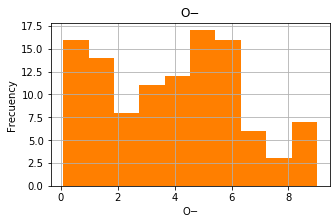

|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 3.4110000000000014       |
|  1 | Median             | 2.7649999999999997       |
|  2 | Mode               | 0    6.0                 |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 2.6118709066543695       |
|  4 | Min                | 0.1                      |
|  5 | Max                | 8.0                      |
|  6 | Quantile           | 0.25    0.970            |
|    |                    | 0.50    2.765            |
|    |                    | 0.75    6.000            |
|    |                    | Name: A−, dtype: float64 |


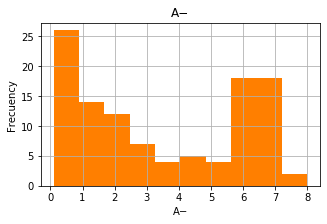

|    | Statistical        | Value                    |
|---:|:-------------------|:-------------------------|
|  0 | Mean               | 1.3302727272727268       |
|  1 | Median             | 1.1                      |
|  2 | Mode               | 0    2.0                 |
|    |                    | dtype: float64           |
|  3 | Standard deviation | 0.9219230590305845       |
|  4 | Min                | 0.01                     |
|  5 | Max                | 3.57                     |
|  6 | Quantile           | 0.25    0.5              |
|    |                    | 0.50    1.1              |
|    |                    | 0.75    2.0              |
|    |                    | Name: B−, dtype: float64 |


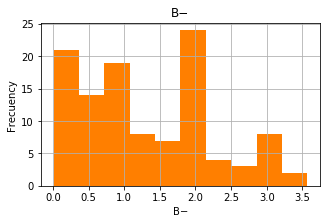

|    | Statistical        | Value                     |
|---:|:-------------------|:--------------------------|
|  0 | Mean               | 0.510090909090909         |
|  1 | Median             | 0.47                      |
|  2 | Mode               | 0    1.0                  |
|    |                    | dtype: float64            |
|  3 | Standard deviation | 0.3972601011805636        |
|  4 | Min                | 0.01                      |
|  5 | Max                | 1.2                       |
|  6 | Quantile           | 0.25    0.10              |
|    |                    | 0.50    0.47              |
|    |                    | 0.75    1.00              |
|    |                    | Name: AB−, dtype: float64 |


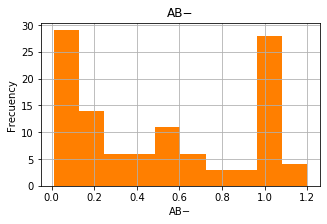

In [153]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

____
____
____
____
# Ethnic group 

## Ethnic and cultural diversity level

In [154]:
data = pd.read_csv(path_data + 'ethnic_diversity_level.tsv', sep='\t')

In [155]:
data

,Country,Ethnic Fractionalization,Linguistic Fractionalization,Religious Fractionalization
0,Afghanistan,769.3,614.1,271.7
1,Albania,220.4,39.9,471.9
2,Algeria,339.4,442.7,9.1
3,American Samoa,0.0,173.3,639.5
4,Andorra,713.9,684.8,232.6
...,...,...,...,...
210,West Bank,0.0,143.8,309.5
211,Yemen,0.0,8.0,2.3
212,Yugoslavia,809.2,606.4,553.0
213,Zambia,780.8,873.4,735.9


In [156]:
data = dropna(data)

Original shape (215, 4)
After dropna (215, 4)
After drop ".." (215, 4)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                          |
|---:|:-------------------|:-----------------------------------------------|
|  0 | Mean               | 388.2506976744185                              |
|  1 | Median             | 391.8                                          |
|  2 | Mode               | 0    0.0                                       |
|    |                    | dtype: float64                                 |
|  3 | Standard deviation | 280.61264349412943                             |
|  4 | Min                | 0.0                                            |
|  5 | Max                | 930.2                                          |
|  6 | Quantile           | 0.25    124.15                                 |
|    |                    | 0.50    391.80                                 |
|    |                    | 0.75    640.65                                 |
|    |                    | Name: Ethnic Fractionalization, dtype: float64 |

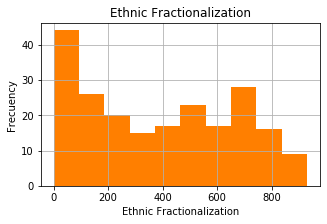

|    | Statistical        | Value                                              |
|---:|:-------------------|:---------------------------------------------------|
|  0 | Mean               | 362.9460465116278                                  |
|  1 | Median             | 326.0                                              |
|  2 | Mode               | 0    0.0                                           |
|    |                    | dtype: float64                                     |
|  3 | Standard deviation | 286.85272992287076                                 |
|  4 | Min                | 0.0                                                |
|  5 | Max                | 922.7                                              |
|  6 | Quantile           | 0.25     92.55                                     |
|    |                    | 0.50    326.00                                     |
|    |                    | 0.75    607.10                                     |
|    |                    | 

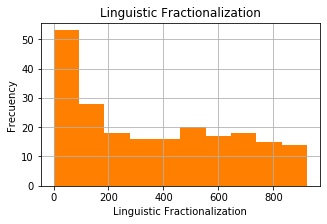

|    | Statistical        | Value                                             |
|---:|:-------------------|:--------------------------------------------------|
|  0 | Mean               | 434.5506976744186                                 |
|  1 | Median             | 459.2                                             |
|  2 | Mode               | 0    141.7                                        |
|    |                    | 1    581.3                                        |
|    |                    | 2    589.8                                        |
|    |                    | dtype: float64                                    |
|  3 | Standard deviation | 228.21669503866448                                |
|  4 | Min                | 0.0                                               |
|  5 | Max                | 860.3                                             |
|  6 | Quantile           | 0.25    233.0                                     |
|    |                    | 0.50    459.

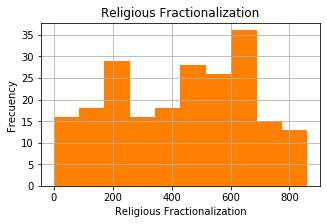

In [158]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

____
____
____
____
# FIFA ranking


## FIFA World Ranking: Men

In [159]:
data = pd.read_csv(path_data + 'fifa_men.tsv', sep='\t')

In [160]:
data

,Country,Total points
0,Afghanistan,1052
1,Albania,1351
2,Algeria,1482
3,American Samoa,900
4,Andorra,1076
...,...,...
205,Vietnam,1258
206,Wales,1550
207,Yemen,1071
208,Zambia,1279


In [161]:
data = dropna(data)

Original shape (210, 2)
After dropna (210, 2)
After drop ".." (210, 2)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 1218.2952380952381                 |
|  1 | Median             | 1199.5                             |
|  2 | Mode               | 0    1351                          |
|    |                    | dtype: int64                       |
|  3 | Standard deviation | 236.99754400074113                 |
|  4 | Min                | 811                                |
|  5 | Max                | 1773                               |
|  6 | Quantile           | 0.25    1019.25                    |
|    |                    | 0.50    1199.50                    |
|    |                    | 0.75    1413.00                    |
|    |                    | Name: Total points, dtype: float64 |


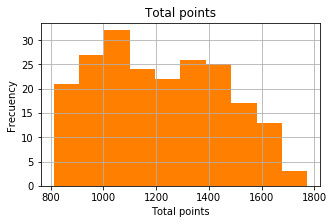

In [163]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

## FIFA World Ranking: Women

In [164]:
data = pd.read_csv(path_data + 'fifa_women.tsv', sep='\t')

In [165]:
data

,Team,Total Points
0,Albania,1325
1,Algeria,1271
2,American Samoa,1030
3,Andorra,749
4,Angola,1117
...,...,...
154,Venezuela,1425
155,Vietnam,1657
156,Wales,1658
157,Zambia,1198


In [166]:
data = dropna(data)

Original shape (159, 2)
After dropna (159, 2)
After drop ".." (159, 2)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 1340.0                             |
|  1 | Median             | 1290.0                             |
|  2 | Mode               | 0     1114                         |
|    |                    | 1     1131                         |
|    |                    | 2     1151                         |
|    |                    | 3     1169                         |
|    |                    | 4     1201                         |
|    |                    | 5     1240                         |
|    |                    | 6     1369                         |
|    |                    | 7     1401                         |
|    |                    | 8     1432                         |
|    |                    | 9     1434                         |
|    |                    | 10    1659                         |
|    |                   

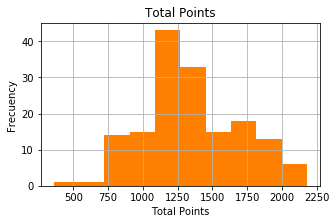

In [169]:
for col in data.columns: 
        if col != 'Team':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

____
____
____
____
# Mobility

## Railways

In [170]:
data = pd.read_csv(path_data + 'railways.tsv', sep='\t')

In [171]:
data

,Country,Rail lines,Passengers carried,Goods hauled
0,Afghanistan,..,..,..
1,Albania,..,..,..
2,Algeria,4016,1550,1009
3,American Samoa,..,..,..
4,Andorra,..,..,..
...,...,...,...,...
221,Sub-Saharan Africa,..,..,..
222,Low income,..,..,..
223,Lower middle income,..,..,..
224,Upper middle income,..,..,..


In [172]:
data = dropna(data)

Original shape (226, 4)
After dropna (226, 4)
After drop ".." (53, 4)


|    | Statistical        | Value                            |
|---:|:-------------------|:---------------------------------|
|  0 | Mean               | 13266.0                          |
|  1 | Median             | 4016.0                           |
|  2 | Mode               | 0        249.0                   |
|    |                    | 1        424.0                   |
|    |                    | 2        620.0                   |
|    |                    | 3        683.0                   |
|    |                    | 4        686.0                   |
|    |                    | 5        810.0                   |
|    |                    | 6       1004.0                   |
|    |                    | 7       1018.0                   |
|    |                    | 8       1151.0                   |
|    |                    | 9       1209.0                   |
|    |                    | 10      1285.0                   |
|    |                    | 11      1495.0             

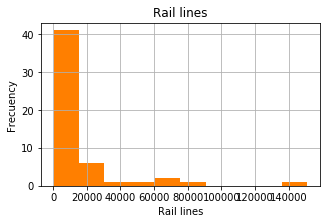

|    | Statistical        | Value                                    |
|---:|:-------------------|:-----------------------------------------|
|  0 | Mean               | 52986.622641509435                       |
|  1 | Median             | 4271.0                                   |
|  2 | Mode               | 0          23.0                          |
|    |                    | 1          25.0                          |
|    |                    | 2          28.0                          |
|    |                    | 3          29.0                          |
|    |                    | 4          42.0                          |
|    |                    | 5          43.0                          |
|    |                    | 6          59.0                          |
|    |                    | 7          60.0                          |
|    |                    | 8          77.0                          |
|    |                    | 9         174.0                          |
|    |

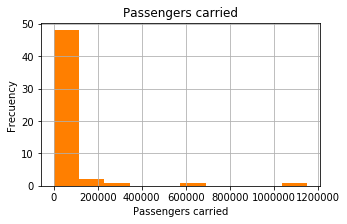

|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 170990.15094339623                 |
|  1 | Median             | 6649.0                             |
|  2 | Mode               | 0         100.0                    |
|    |                    | 1         127.0                    |
|    |                    | 2         165.0                    |
|    |                    | 3         169.0                    |
|    |                    | 4         194.0                    |
|    |                    | 5         277.0                    |
|    |                    | 6         447.0                    |
|    |                    | 7         664.0                    |
|    |                    | 8         689.0                    |
|    |                    | 9         842.0                    |
|    |                    | 10        935.0                    |
|    |                   

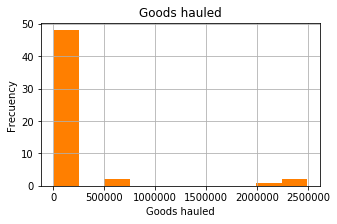

In [173]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Ports

In [174]:
data = pd.read_csv(path_data + 'ports.tsv', sep='\t')

In [175]:
data

,Country,Port container traffic
0,Afghanistan,..
1,Albania,..
2,Algeria,1466
3,American Samoa,..
4,Andorra,..
...,...,...
221,Sub-Saharan Africa,17122
222,Low income,..
223,Lower middle income,81626
224,Upper middle income,338016


In [176]:
data = dropna(data)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (148, 2)


|    | Statistical        | Value                                        |
|---:|:-------------------|:---------------------------------------------|
|  0 | Mean               | 21305.736486486487                           |
|  1 | Median             | 1184.5                                       |
|  2 | Mode               | 0    30.0                                    |
|    |                    | 1    89.0                                    |
|    |                    | 2    98.0                                    |
|    |                    | dtype: float64                               |
|  3 | Standard deviation | 86539.28352227755                            |
|  4 | Min                | 8.0                                          |
|  5 | Max                | 792659.0                                     |
|  6 | Quantile           | 0.25     256.5                               |
|    |                    | 0.50    1184.5                               |
|    |                   

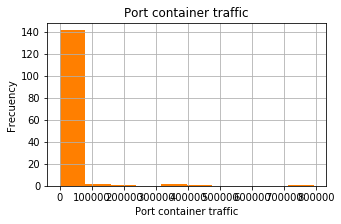

In [177]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Air

In [178]:
data = pd.read_csv(path_data + 'air.tsv', sep='\t')

In [179]:
data

,Country,Registered carrier departures worldwide,Passengers carried,Air freight
0,Afghanistan,24,1723,30
1,Albania,3,303,..
2,Algeria,77,6442,28
3,American Samoa,..,..,..
4,Andorra,..,..,..
...,...,...,...,...
221,Sub-Saharan Africa,788,63071,3586
222,Low income,228,18442,1564
223,Lower middle income,3065,355943,6042
224,Upper middle income,11423,1409279,49797


In [180]:
data = dropna(data)

Original shape (226, 4)
After dropna (226, 4)
After drop ".." (155, 4)


|    | Statistical        | Value                                                         |
|---:|:-------------------|:--------------------------------------------------------------|
|  0 | Mean               | 953.4064516129032                                             |
|  1 | Median             | 52.0                                                          |
|  2 | Mode               | 0     2.0                                                     |
|    |                    | 1     7.0                                                     |
|    |                    | 2    14.0                                                     |
|    |                    | dtype: float64                                                |
|  3 | Standard deviation | 3880.480310170436                                             |
|  4 | Min                | 0.0                                                           |
|  5 | Max                | 37000.0                                             

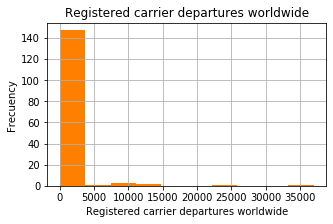

|    | Statistical        | Value                                    |
|---:|:-------------------|:-----------------------------------------|
|  0 | Mean               | 109011.86451612903                       |
|  1 | Median             | 3408.0                                   |
|  2 | Mode               | 0     26.0                               |
|    |                    | 1    561.0                               |
|    |                    | 2    566.0                               |
|    |                    | dtype: float64                           |
|  3 | Standard deviation | 439628.1809693909                        |
|  4 | Min                | 1.0                                      |
|  5 | Max                | 4232645.0                                |
|  6 | Quantile           | 0.25      591.5                          |
|    |                    | 0.50     3408.0                          |
|    |                    | 0.75    29018.5                          |
|    |

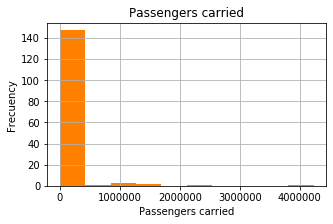

|    | Statistical        | Value                             |
|---:|:-------------------|:----------------------------------|
|  0 | Mean               | 5691.8387096774195                |
|  1 | Median             | 48.0                              |
|  2 | Mode               | 0    0.0                          |
|    |                    | dtype: float64                    |
|  3 | Standard deviation | 23913.421363702273                |
|  4 | Min                | 0.0                               |
|  5 | Max                | 220707.0                          |
|  6 | Quantile           | 0.25       2.0                    |
|    |                    | 0.50      48.0                    |
|    |                    | 0.75    1255.5                    |
|    |                    | Name: Air freight, dtype: float64 |


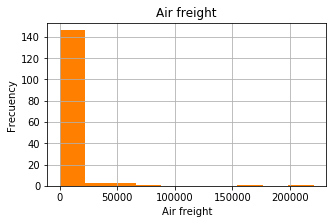

In [181]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
___
# Government

## Government: Revenue

In [184]:
data = pd.read_csv(path_data + 'government_revenue.tsv', sep='\t')

In [185]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,11.1,12.2
1,Albania,23.9,25.5
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,23
222,Low income,..,..
223,Lower middle income,16.9,15.5
224,Upper middle income,18.9,20.3


In [186]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (143, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 26.875524475524497                         |
|  1 | Median             | 23.9                                       |
|  2 | Mode               | 0    26.6                                  |
|    |                    | 1    34.4                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 23.318324465642046                         |
|  4 | Min                | 3.4                                        |
|  5 | Max                | 274.5                                      |
|  6 | Quantile           | 0.25    16.85                              |
|    |                    | 0.50    23.90                              |
|    |                    | 0.75    32.85                              |
|    |                    | Name: Goveernment % (20

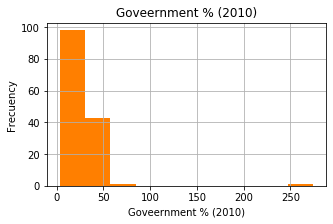

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 26.4965034965035                           |
|  1 | Median             | 25.6                                       |
|  2 | Mode               | 0    15.5                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 11.982195786139622                         |
|  4 | Min                | 3.4                                        |
|  5 | Max                | 99.6                                       |
|  6 | Quantile           | 0.25    17.60                              |
|    |                    | 0.50    25.60                              |
|    |                    | 0.75    33.35                              |
|    |                    | Name: Goveernment % (2018), dtype: float64 |


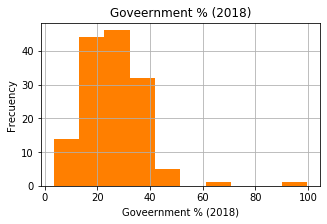

In [187]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Expense

In [188]:
data = pd.read_csv(path_data + 'government_expense.tsv', sep='\t')

In [189]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,50.9,36.7
1,Albania,23,23.3
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,25
222,Low income,..,..
223,Lower middle income,19,16.8
224,Upper middle income,..,..


In [190]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (139, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 27.397841726618708                         |
|  1 | Median             | 25.8                                       |
|  2 | Mode               | 0    10.6                                  |
|    |                    | 1    16.3                                  |
|    |                    | 2    26.2                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 13.062999342794152                         |
|  4 | Min                | 4.1                                        |
|  5 | Max                | 83.6                                       |
|  6 | Quantile           | 0.25    16.8                               |
|    |                    | 0.50    25.8                               |
|    |                    | 0.75    36.0           

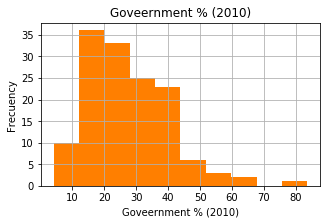

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 26.781294964028785                         |
|  1 | Median             | 26.6                                       |
|  2 | Mode               | 0    15.1                                  |
|    |                    | 1    21.4                                  |
|    |                    | 2    23.3                                  |
|    |                    | 3    35.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 11.31923826203228                          |
|  4 | Min                | 4.0                                        |
|  5 | Max                | 76.7                                       |
|  6 | Quantile           | 0.25    17.6                               |
|    |                    | 0.50    26.6           

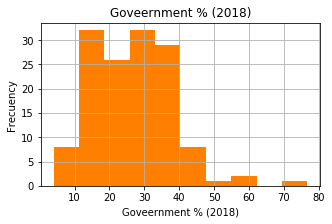

In [191]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Net investment in nonfinancial assets

In [209]:
data = pd.read_csv(path_data + 'government_nonfinancial_assets.tsv', sep='\t')

In [210]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,31.4,18.5
1,Albania,5.1,3.9
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,..
222,Low income,..,..
223,Lower middle income,1.6,..
224,Upper middle income,0.9,1.1


In [211]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (123, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 3.963414634146341                          |
|  1 | Median             | 2.2                                        |
|  2 | Mode               | 0    1.6                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 5.197970415597173                          |
|  4 | Min                | -3.1                                       |
|  5 | Max                | 32.1                                       |
|  6 | Quantile           | 0.25    1.55                               |
|    |                    | 0.50    2.20                               |
|    |                    | 0.75    4.20                               |
|    |                    | Name: Goveernment % (2010), dtype: float64 |


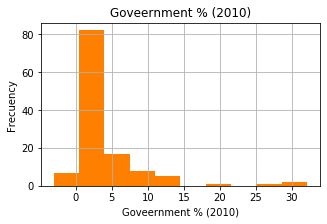

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 3.600813008130081                          |
|  1 | Median             | 2.0                                        |
|  2 | Mode               | 0    1.5                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 4.886104350813899                          |
|  4 | Min                | -1.0                                       |
|  5 | Max                | 39.9                                       |
|  6 | Quantile           | 0.25    1.30                               |
|    |                    | 0.50    2.00                               |
|    |                    | 0.75    3.85                               |
|    |                    | Name: Goveernment % (2018), dtype: float64 |


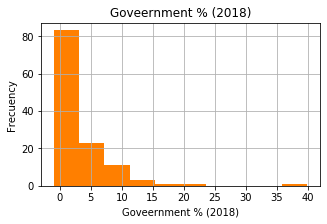

In [212]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Net lending (+) / net borrowing (-)

In [213]:
data = pd.read_csv(path_data + 'government_net_lending.tsv', sep='\t')

In [214]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,1.5,0.3
1,Albania,-3.9,-1.3
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,-4.6
222,Low income,..,..
223,Lower middle income,-3.3,-2.5
224,Upper middle income,..,..


In [215]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (134, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | -0.9402985074626866                        |
|  1 | Median             | -2.8499999999999996                        |
|  2 | Mode               | 0   -4.0                                   |
|    |                    | 1   -3.3                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 17.446050544735662                         |
|  4 | Min                | -32.0                                      |
|  5 | Max                | 186.4                                      |
|  6 | Quantile           | 0.25   -4.675                              |
|    |                    | 0.50   -2.850                              |
|    |                    | 0.75   -0.600                              |
|    |                    | Name: Goveernment % (20

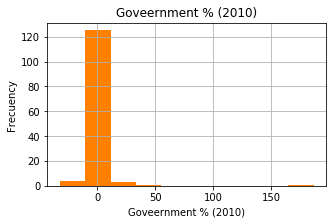

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | -0.9798507462686565                        |
|  1 | Median             | -1.45                                      |
|  2 | Mode               | 0   -1.9                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 4.693360849943395                          |
|  4 | Min                | -20.9                                      |
|  5 | Max                | 24.4                                       |
|  6 | Quantile           | 0.25   -2.750                              |
|    |                    | 0.50   -1.450                              |
|    |                    | 0.75    0.675                              |
|    |                    | Name: Goveernment % (2018), dtype: float64 |


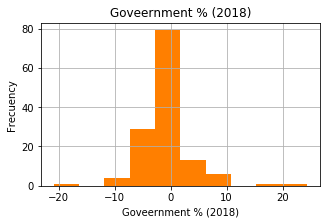

In [216]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Net acquisition of financial assets

In [217]:
data = pd.read_csv(path_data + 'government_financial_assets.tsv', sep='\t')

In [218]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,2.6,0.7
1,Albania,0.1,1.9
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,1.8
222,Low income,..,..
223,Lower middle income,1.2,1.3
224,Upper middle income,..,..


In [219]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (93, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 3.588172043010754                          |
|  1 | Median             | 0.8                                        |
|  2 | Mode               | 0   -0.9                                   |
|    |                    | 1    0.3                                   |
|    |                    | 2    1.6                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 19.62475615723541                          |
|  4 | Min                | -7.0                                       |
|  5 | Max                | 186.4                                      |
|  6 | Quantile           | 0.25   -0.3                                |
|    |                    | 0.50    0.8                                |
|    |                    | 0.75    2.5            

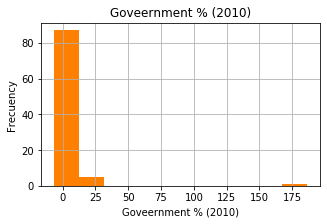

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 1.633333333333333                          |
|  1 | Median             | 0.7                                        |
|  2 | Mode               | 0    0.1                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 3.8165923035601006                         |
|  4 | Min                | -3.3                                       |
|  5 | Max                | 19.4                                       |
|  6 | Quantile           | 0.25    0.0                                |
|    |                    | 0.50    0.7                                |
|    |                    | 0.75    2.1                                |
|    |                    | Name: Goveernment % (2018), dtype: float64 |


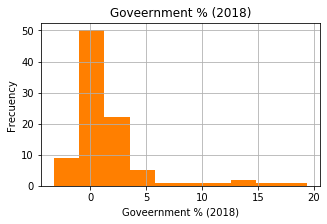

In [220]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Net incurrence of liabilities

In [221]:
data = pd.read_csv(path_data + 'government_liabilities.tsv', sep='\t')

In [222]:
data

,Country,Goveernment % (2010),Goveernment % (2018)
0,Afghanistan,1.1,0.4
1,Albania,4,3.2
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,6.6
222,Low income,..,..
223,Lower middle income,4.5,3.7
224,Upper middle income,..,..


In [223]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (92, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 3.496739130434784                          |
|  1 | Median             | 2.8                                        |
|  2 | Mode               | 0    0.3                                   |
|    |                    | 1    1.4                                   |
|    |                    | 2    1.6                                   |
|    |                    | 3    1.8                                   |
|    |                    | 4    2.5                                   |
|    |                    | 5    4.0                                   |
|    |                    | 6    4.9                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 4.971621688836905                          |
|  4 | Min                | -24.0                  

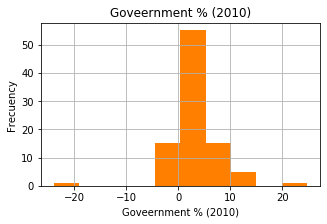

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 2.510869565217391                          |
|  1 | Median             | 2.6500000000000004                         |
|  2 | Mode               | 0    3.7                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 3.4677305661632807                         |
|  4 | Min                | -9.5                                       |
|  5 | Max                | 20.4                                       |
|  6 | Quantile           | 0.25    0.60                               |
|    |                    | 0.50    2.65                               |
|    |                    | 0.75    3.75                               |
|    |                    | Name: Goveernment % (2018), dtype: float64 |


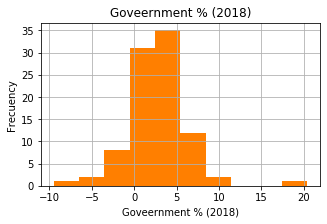

In [224]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Debt payments

In [226]:
data = pd.read_csv(path_data + 'government_debt.tsv', sep='\t')

In [227]:
data

,Country,Total debt % (2010),Total debt % (2018)
0,Afghanistan,..,..
1,Albania,69.6,80.7
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,..
222,Low income,..,..
223,Lower middle income,..,..
224,Upper middle income,..,..


In [228]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (47, 3)


|    | Statistical        | Value                                     |
|---:|:-------------------|:------------------------------------------|
|  0 | Mean               | 51.865957446808515                        |
|  1 | Median             | 47.4                                      |
|  2 | Mode               | 0    21.6                                 |
|    |                    | 1    85.5                                 |
|    |                    | dtype: float64                            |
|  3 | Standard deviation | 33.694698825700634                        |
|  4 | Min                | 0.0                                       |
|  5 | Max                | 162.3                                     |
|  6 | Quantile           | 0.25    25.30                             |
|    |                    | 0.50    47.40                             |
|    |                    | 0.75    72.05                             |
|    |                    | Name: Total debt % (2010), dtype: fl

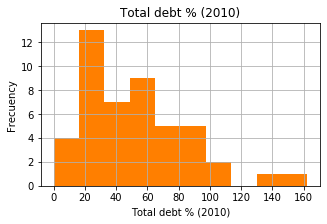

|    | Statistical        | Value                                     |
|---:|:-------------------|:------------------------------------------|
|  0 | Mean               | 61.12553191489362                         |
|  1 | Median             | 51.9                                      |
|  2 | Mode               | 0    31.9                                 |
|    |                    | 1    99.0                                 |
|    |                    | dtype: float64                            |
|  3 | Standard deviation | 38.713700911923574                        |
|  4 | Min                | 0.1                                       |
|  5 | Max                | 196.6                                     |
|  6 | Quantile           | 0.25    33.6                              |
|    |                    | 0.50    51.9                              |
|    |                    | 0.75    79.2                              |
|    |                    | Name: Total debt % (2018), dtype: fl

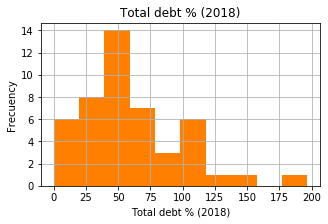

In [229]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government: Interest payments

In [230]:
data = pd.read_csv(path_data + 'government_interest.tsv', sep='\t')

In [231]:
data

,Country,Interest % (2010),Interest % (2018)
0,Afghanistan,0,0.1
1,Albania,13,8.6
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,4.4,9.4
222,Low income,..,..
223,Lower middle income,5.4,10.2
224,Upper middle income,5.8,9.8


In [232]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (140, 3)


|    | Statistical        | Value                                   |
|---:|:-------------------|:----------------------------------------|
|  0 | Mean               | 7.572857142857141                       |
|  1 | Median             | 5.35                                    |
|  2 | Mode               | 0    4.4                                |
|    |                    | dtype: float64                          |
|  3 | Standard deviation | 7.8226000098878155                      |
|  4 | Min                | 0.0                                     |
|  5 | Max                | 50.5                                    |
|  6 | Quantile           | 0.25     2.475                          |
|    |                    | 0.50     5.350                          |
|    |                    | 0.75    10.025                          |
|    |                    | Name: Interest % (2010), dtype: float64 |


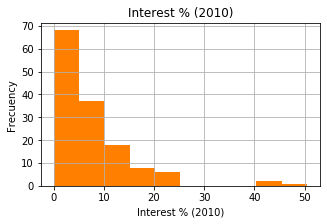

|    | Statistical        | Value                                   |
|---:|:-------------------|:----------------------------------------|
|  0 | Mean               | 8.18285714285714                        |
|  1 | Median             | 6.15                                    |
|  2 | Mode               | 0    1.7                                |
|    |                    | 1    4.1                                |
|    |                    | dtype: float64                          |
|  3 | Standard deviation | 8.135276614286436                       |
|  4 | Min                | 0.0                                     |
|  5 | Max                | 50.0                                    |
|  6 | Quantile           | 0.25     2.80                           |
|    |                    | 0.50     6.15                           |
|    |                    | 0.75    10.55                           |
|    |                    | Name: Interest % (2018), dtype: float64 |


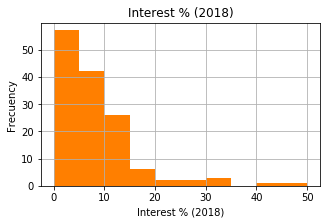

In [233]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Expenditure: Goods and services

In [234]:
data = pd.read_csv(path_data + 'gov_expenditure_goods.tsv', sep='\t')

In [235]:
data

,Country,Expenditure % (2010),Expenditure % (2018)
0,Afghanistan,75,55
1,Albania,9,9
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,22,19
222,Low income,..,..
223,Lower middle income,15,16
224,Upper middle income,13,12


In [236]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (141, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 17.26950354609929                          |
|  1 | Median             | 13.0                                       |
|  2 | Mode               | 0    10.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 11.949225577192449                         |
|  4 | Min                | 2.0                                        |
|  5 | Max                | 75.0                                       |
|  6 | Quantile           | 0.25    10.0                               |
|    |                    | 0.50    13.0                               |
|    |                    | 0.75    21.0                               |
|    |                    | Name: Expenditure % (2010), dtype: float64 |


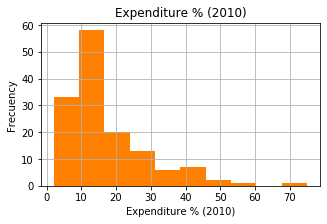

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 16.099290780141843                         |
|  1 | Median             | 13.0                                       |
|  2 | Mode               | 0    9.0                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 10.596026859521453                         |
|  4 | Min                | 3.0                                        |
|  5 | Max                | 55.0                                       |
|  6 | Quantile           | 0.25     9.0                               |
|    |                    | 0.50    13.0                               |
|    |                    | 0.75    20.0                               |
|    |                    | Name: Expenditure % (2018), dtype: float64 |


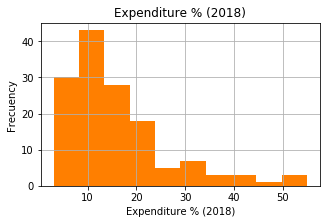

In [237]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Expenditure: Compensation of employees

In [238]:
data = pd.read_csv(path_data + 'gov_expenditure_compensation_employees.tsv', sep='\t')

In [239]:
data

,Country,Expenditure % (2010),Expenditure % (2018)
0,Afghanistan,23,34
1,Albania,27,24
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,35,37
222,Low income,..,..
223,Lower middle income,36,34
224,Upper middle income,21,22


In [240]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (142, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 26.816901408450704                         |
|  1 | Median             | 25.0                                       |
|  2 | Mode               | 0    14.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 13.337208506886595                         |
|  4 | Min                | 6.0                                        |
|  5 | Max                | 60.0                                       |
|  6 | Quantile           | 0.25    15.25                              |
|    |                    | 0.50    25.00                              |
|    |                    | 0.75    36.00                              |
|    |                    | Name: Expenditure % (2010), dtype: float64 |


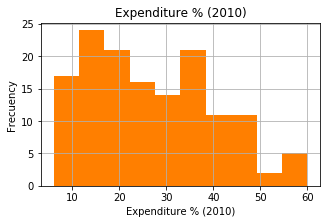

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 27.232394366197184                         |
|  1 | Median             | 25.0                                       |
|  2 | Mode               | 0    16.0                                  |
|    |                    | 1    22.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 13.229381384441355                         |
|  4 | Min                | 6.0                                        |
|  5 | Max                | 55.0                                       |
|  6 | Quantile           | 0.25    16.00                              |
|    |                    | 0.50    25.00                              |
|    |                    | 0.75    37.75                              |
|    |                    | Name: Expenditure % (20

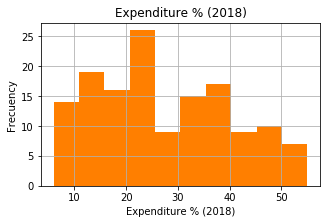

In [241]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Expenditure: Interest payments

In [242]:
data = pd.read_csv(path_data + 'gov_expenditure_interest_payments.tsv', sep='\t')

In [243]:
data

,Country,Expenditure % (2010),Expenditure % (2018)
0,Afghanistan,0,0
1,Albania,14,10
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,6,10
222,Low income,..,..
223,Lower middle income,7,10
224,Upper middle income,7,10


In [244]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (139, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 7.438848920863309                          |
|  1 | Median             | 6.0                                        |
|  2 | Mode               | 0    2.0                                   |
|    |                    | 1    4.0                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 6.810174727922611                          |
|  4 | Min                | 0.0                                        |
|  5 | Max                | 39.0                                       |
|  6 | Quantile           | 0.25     3.0                               |
|    |                    | 0.50     6.0                               |
|    |                    | 0.75    10.0                               |
|    |                    | Name: Expenditure % (20

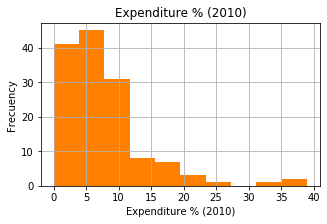

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 8.028776978417266                          |
|  1 | Median             | 6.0                                        |
|  2 | Mode               | 0    4.0                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 6.912436226131546                          |
|  4 | Min                | 0.0                                        |
|  5 | Max                | 36.0                                       |
|  6 | Quantile           | 0.25     3.0                               |
|    |                    | 0.50     6.0                               |
|    |                    | 0.75    10.0                               |
|    |                    | Name: Expenditure % (2018), dtype: float64 |


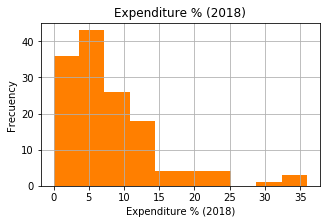

In [245]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Expenditure: Subsidies and other transfers

In [246]:
data = pd.read_csv(path_data + 'gov_expenditure_subsidies.tsv', sep='\t')

In [247]:
data

,Country,Expenditure % (2010),Expenditure % (2018)
0,Afghanistan,2,10
1,Albania,45,53
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,26,21
222,Low income,..,..
223,Lower middle income,26,29
224,Upper middle income,44,46


In [248]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (138, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 37.731884057971016                         |
|  1 | Median             | 37.0                                       |
|  2 | Mode               | 0    42.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 19.395062903676138                         |
|  4 | Min                | 0.0                                        |
|  5 | Max                | 81.0                                       |
|  6 | Quantile           | 0.25    22.0                               |
|    |                    | 0.50    37.0                               |
|    |                    | 0.75    51.0                               |
|    |                    | Name: Expenditure % (2010), dtype: float64 |


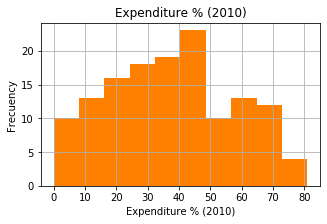

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 38.68840579710145                          |
|  1 | Median             | 37.5                                       |
|  2 | Mode               | 0    46.0                                  |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 19.308029691779847                         |
|  4 | Min                | 1.0                                        |
|  5 | Max                | 84.0                                       |
|  6 | Quantile           | 0.25    22.25                              |
|    |                    | 0.50    37.50                              |
|    |                    | 0.75    53.75                              |
|    |                    | Name: Expenditure % (2018), dtype: float64 |


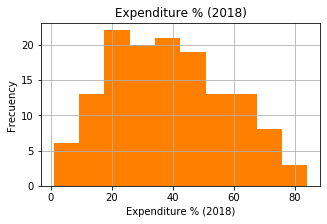

In [249]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Expenditure: Other expense

In [250]:
data = pd.read_csv(path_data + 'gov_expenditure_others.tsv', sep='\t')

In [251]:
data

,Country,Expenditure % (2010),Expenditure % (2018)
0,Afghanistan,0,1
1,Albania,5,5
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,5
222,Low income,..,..
223,Lower middle income,8,2
224,Upper middle income,5,5


In [252]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (131, 3)


|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 7.969465648854962                          |
|  1 | Median             | 7.0                                        |
|  2 | Mode               | 0    5.0                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 6.6436076058091205                         |
|  4 | Min                | 0.0                                        |
|  5 | Max                | 36.0                                       |
|  6 | Quantile           | 0.25     4.0                               |
|    |                    | 0.50     7.0                               |
|    |                    | 0.75    10.0                               |
|    |                    | Name: Expenditure % (2010), dtype: float64 |


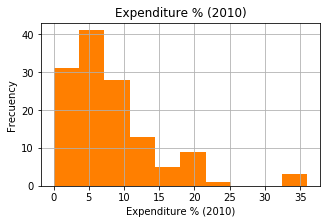

|    | Statistical        | Value                                      |
|---:|:-------------------|:-------------------------------------------|
|  0 | Mean               | 7.206106870229007                          |
|  1 | Median             | 6.0                                        |
|  2 | Mode               | 0    2.0                                   |
|    |                    | 1    5.0                                   |
|    |                    | dtype: float64                             |
|  3 | Standard deviation | 6.36664089339221                           |
|  4 | Min                | 0.0                                        |
|  5 | Max                | 32.0                                       |
|  6 | Quantile           | 0.25    3.0                                |
|    |                    | 0.50    6.0                                |
|    |                    | 0.75    9.0                                |
|    |                    | Name: Expenditure % (20

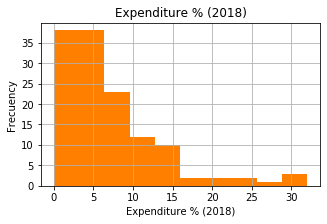

In [253]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Taxes on income, profits and capital gains

In [254]:
data = pd.read_csv(path_data + 'gov_revenues_capital_gains.tsv', sep='\t')

In [255]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,3,5
1,Albania,15,17
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,21,25
222,Low income,..,..
223,Lower middle income,25,25
224,Upper middle income,21,26


In [256]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (140, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 23.271428571428572                     |
|  1 | Median             | 22.0                                   |
|  2 | Mode               | 0    16.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 12.668344311108271                     |
|  4 | Min                | 1.0                                    |
|  5 | Max                | 75.0                                   |
|  6 | Quantile           | 0.25    15.0                           |
|    |                    | 0.50    22.0                           |
|    |                    | 0.75    30.0                           |
|    |                    | Name: Revenue % (2010), dtype: float64 |


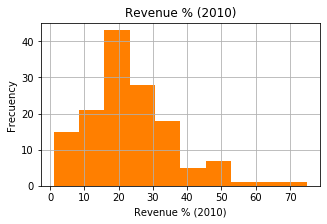

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 24.771428571428572                     |
|  1 | Median             | 24.0                                   |
|  2 | Mode               | 0    25.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 12.052846976820865                     |
|  4 | Min                | 2.0                                    |
|  5 | Max                | 65.0                                   |
|  6 | Quantile           | 0.25    16.00                          |
|    |                    | 0.50    24.00                          |
|    |                    | 0.75    32.25                          |
|    |                    | Name: Revenue % (2018), dtype: float64 |


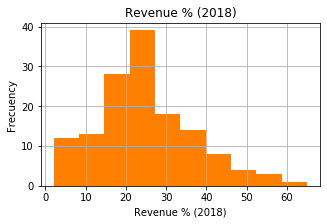

In [257]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Taxes on goods and services

In [258]:
data = pd.read_csv(path_data + 'gov_revenues_goods.tsv', sep='\t')

In [259]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,3,9
1,Albania,56,53
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,29,34
222,Low income,..,..
223,Lower middle income,30,39
224,Upper middle income,39,35


In [260]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (144, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 30.59027777777778                      |
|  1 | Median             | 31.0                                   |
|  2 | Mode               | 0    30.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 13.915536014816054                     |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 89.0                                   |
|  6 | Quantile           | 0.25    24.0                           |
|    |                    | 0.50    31.0                           |
|    |                    | 0.75    39.0                           |
|    |                    | Name: Revenue % (2010), dtype: float64 |


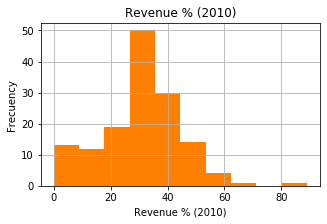

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 33.00694444444444                      |
|  1 | Median             | 34.0                                   |
|  2 | Mode               | 0    33.0                              |
|    |                    | 1    35.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 13.436458349427983                     |
|  4 | Min                | 1.0                                    |
|  5 | Max                | 83.0                                   |
|  6 | Quantile           | 0.25    25.75                          |
|    |                    | 0.50    34.00                          |
|    |                    | 0.75    42.25                          |
|    |                    | Name: Revenue % (2018), dtype: float64 |


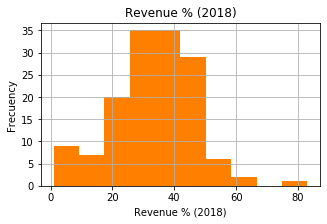

In [261]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Taxes on international trade

In [262]:
data = pd.read_csv(path_data + 'gov_revenues_international_trade.tsv', sep='\t')

In [263]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,5,7
1,Albania,3,1
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,11,11
222,Low income,..,..
223,Lower middle income,6,7
224,Upper middle income,4,4


In [264]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (122, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 8.549180327868852                      |
|  1 | Median             | 5.0                                    |
|  2 | Mode               | 0    1.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 9.535581438599943                      |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 49.0                                   |
|  6 | Quantile           | 0.25     2.00                          |
|    |                    | 0.50     5.00                          |
|    |                    | 0.75    12.75                          |
|    |                    | Name: Revenue % (2010), dtype: float64 |


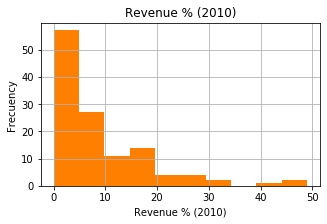

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 7.385245901639344                      |
|  1 | Median             | 4.0                                    |
|  2 | Mode               | 0    3.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 7.641174589851116                      |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 32.0                                   |
|  6 | Quantile           | 0.25     2.0                           |
|    |                    | 0.50     4.0                           |
|    |                    | 0.75    11.0                           |
|    |                    | Name: Revenue % (2018), dtype: float64 |


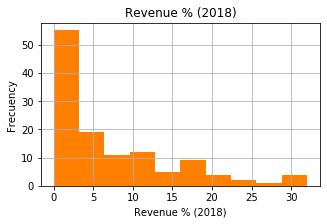

In [265]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Other taxes

In [266]:
data = pd.read_csv(path_data + 'gov_revenues_others.tsv', sep='\t')

In [267]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,0,0
1,Albania,1,0
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,2
222,Low income,..,..
223,Lower middle income,0,1
224,Upper middle income,1,1


In [268]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (128, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 2.390625                               |
|  1 | Median             | 1.0                                    |
|  2 | Mode               | 0    0.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 3.6763435596396508                     |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 28.0                                   |
|  6 | Quantile           | 0.25    0.0                            |
|    |                    | 0.50    1.0                            |
|    |                    | 0.75    3.0                            |
|    |                    | Name: Revenue % (2010), dtype: float64 |


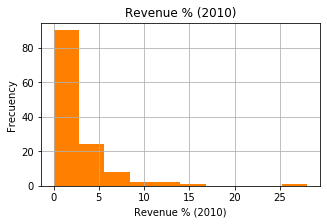

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 2.2734375                              |
|  1 | Median             | 1.0                                    |
|  2 | Mode               | 0    0.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 3.8284365834147422                     |
|  4 | Min                | -1.0                                   |
|  5 | Max                | 30.0                                   |
|  6 | Quantile           | 0.25    0.0                            |
|    |                    | 0.50    1.0                            |
|    |                    | 0.75    3.0                            |
|    |                    | Name: Revenue % (2018), dtype: float64 |


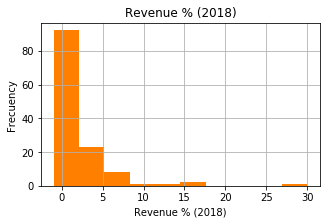

In [269]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Social contributions

In [270]:
data = pd.read_csv(path_data + 'gov_revenues_social_contributions.tsv', sep='\t')

In [271]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,0,1
1,Albania,17,21
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,..,..
222,Low income,..,..
223,Lower middle income,..,..
224,Upper middle income,13,16


In [272]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (94, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 18.414893617021278                     |
|  1 | Median             | 17.5                                   |
|  2 | Mode               | 0    0.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 14.50651286767288                      |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 56.0                                   |
|  6 | Quantile           | 0.25     3.25                          |
|    |                    | 0.50    17.50                          |
|    |                    | 0.75    32.00                          |
|    |                    | Name: Revenue % (2010), dtype: float64 |


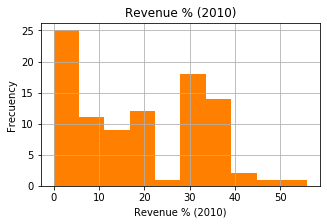

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 18.585106382978722                     |
|  1 | Median             | 19.5                                   |
|  2 | Mode               | 0    1.0                               |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 14.414307090987485                     |
|  4 | Min                | 0.0                                    |
|  5 | Max                | 56.0                                   |
|  6 | Quantile           | 0.25     3.0                           |
|    |                    | 0.50    19.5                           |
|    |                    | 0.75    31.0                           |
|    |                    | Name: Revenue % (2018), dtype: float64 |


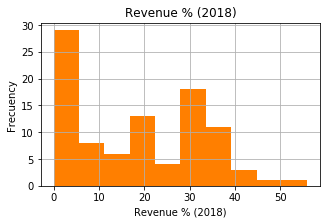

In [273]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Government Revenues: Grants and other revenue

In [274]:
data = pd.read_csv(path_data + 'gov_revenues_grants.tsv', sep='\t')

In [275]:
data

,Country,Revenue % (2010),Revenue % (2018)
0,Afghanistan,89,79
1,Albania,9,7
2,Algeria,..,..
3,American Samoa,..,..
4,Andorra,..,..
...,...,...,...
221,Sub-Saharan Africa,33,21
222,Low income,..,..
223,Lower middle income,23,19
224,Upper middle income,15,18


In [276]:
data = dropna(data)

Original shape (226, 3)
After dropna (226, 3)
After drop ".." (130, 3)


|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 26.99230769230769                      |
|  1 | Median             | 18.0                                   |
|  2 | Mode               | 0    15.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 21.483541980516677                     |
|  4 | Min                | 4.0                                    |
|  5 | Max                | 98.0                                   |
|  6 | Quantile           | 0.25    12.00                          |
|    |                    | 0.50    18.00                          |
|    |                    | 0.75    35.75                          |
|    |                    | Name: Revenue % (2010), dtype: float64 |


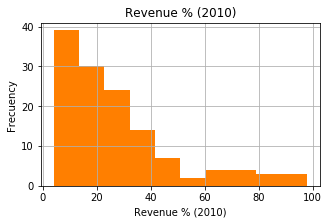

|    | Statistical        | Value                                  |
|---:|:-------------------|:---------------------------------------|
|  0 | Mean               | 23.253846153846155                     |
|  1 | Median             | 16.5                                   |
|  2 | Mode               | 0    13.0                              |
|    |                    | dtype: float64                         |
|  3 | Standard deviation | 19.371245187937372                     |
|  4 | Min                | 3.0                                    |
|  5 | Max                | 96.0                                   |
|  6 | Quantile           | 0.25    10.0                           |
|    |                    | 0.50    16.5                           |
|    |                    | 0.75    27.0                           |
|    |                    | Name: Revenue % (2018), dtype: float64 |


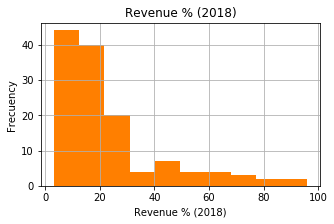

In [277]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
___
# Social Media

## Internet use

In [192]:
data = pd.read_csv(path_data + 'internet_use.tsv', sep='\t')

In [193]:
data

,Country,Individuals using the Internet
0,Afghanistan,11.4
1,Albania,69.6
2,Algeria,49
3,American Samoa,..
4,Andorra,91.6
...,...,...
259,Sub-Saharan Africa,18.7
260,Sub-Saharan Africa (excluding high income),18.7
261,Sub-Saharan Africa (IDA & IBRD countries),18.7
262,Upper middle income,56.4


In [194]:
data = dropna(data)

Original shape (264, 2)
After dropna (264, 2)
After drop ".." (254, 2)


|    | Statistical        | Value                                                |
|---:|:-------------------|:-----------------------------------------------------|
|  0 | Mean               | 54.66496062992129                                    |
|  1 | Median             | 59.35                                                |
|  2 | Mode               | 0    18.7                                            |
|    |                    | 1    20.1                                            |
|    |                    | 2    21.8                                            |
|    |                    | dtype: float64                                       |
|  3 | Standard deviation | 28.403614015277675                                   |
|  4 | Min                | 1.3                                                  |
|  5 | Max                | 99.7                                                 |
|  6 | Quantile           | 0.25    27.600                                       |
|   

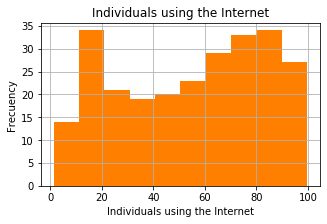

In [195]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Internet application

In [196]:
data = pd.read_csv(path_data + 'internet_application.tsv', sep='\t')

In [197]:
data

,Country,Secure Internet servers
0,Afghanistan,52.9
1,Albania,526.1
2,Algeria,67.6
3,American Samoa,450.7
4,Andorra,5194.4
...,...,...
259,Sub-Saharan Africa,737.7
260,Sub-Saharan Africa (excluding high income),705.3
261,Sub-Saharan Africa (IDA & IBRD countries),737.7
262,Upper middle income,1434.9


In [198]:
data = dropna(data)

Original shape (264, 2)
After dropna (264, 2)
After drop ".." (260, 2)


|    | Statistical        | Value                                         |
|---:|:-------------------|:----------------------------------------------|
|  0 | Mean               | 9653.229230769235                             |
|  1 | Median             | 457.7                                         |
|  2 | Mode               | 0      0.5                                    |
|    |                    | 1      5.4                                    |
|    |                    | 2      6.0                                    |
|    |                    | 3     78.7                                    |
|    |                    | 4    172.1                                    |
|    |                    | 5    737.7                                    |
|    |                    | dtype: float64                                |
|  3 | Standard deviation | 30619.1963770136                              |
|  4 | Min                | 0.0                                           |
|  5 | Max  

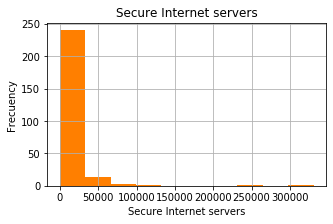

In [199]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)

## Mobile (Cellular only) download speed

In [200]:
data = pd.read_csv(path_data + 'mobile_download speed.tsv', sep='\t')

In [201]:
data

,Country,Average connection speed
0,South Korea,52.4
1,Norway,48.2
2,Canada,42.5
3,Netherlands,42.4
4,Singapore,39.3
...,...,...
82,Ghana,5.1
83,Uzbekistan,5.0
84,Nepal,4.4
85,Algeria,3.1


In [202]:
data = dropna(data)

Original shape (87, 2)
After dropna (87, 2)
After drop ".." (87, 2)


/home/tamara/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


|    | Statistical        | Value                                          |
|---:|:-------------------|:-----------------------------------------------|
|  0 | Mean               | 17.618390804597702                             |
|  1 | Median             | 14.1                                           |
|  2 | Mode               | 0     5.1                                      |
|    |                    | 1     5.4                                      |
|    |                    | 2     5.7                                      |
|    |                    | 3    10.1                                      |
|    |                    | 4    11.2                                      |
|    |                    | 5    12.0                                      |
|    |                    | 6    13.4                                      |
|    |                    | 7    13.6                                      |
|    |                    | 8    16.2                                      |

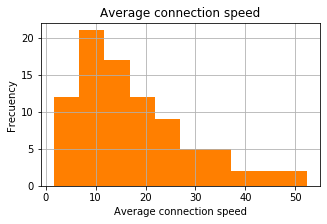

In [204]:
for col in data.columns: 
        if col != 'Country':
            series = data[col]
            statistical_info(series)
            plot_distribution(series, str(col), col)

___
___
___
# Diabetes

## Prevalence of diabetes

In [205]:
data = pd.read_csv(path_data + 'prevalence_diabetes.tsv', sep='\t')

In [206]:
data

,Country,Prevalence %
0,Afghanistan,9.2
1,Albania,9
2,Algeria,6.7
3,American Samoa,..
4,Andorra,7.7
...,...,...
221,Sub-Saharan Africa,5.4
222,Low income,6.4
223,Lower middle income,9.5
224,Upper middle income,9


In [207]:
data = dropna(data)

Original shape (226, 2)
After dropna (226, 2)
After drop ".." (220, 2)


|    | Statistical        | Value                              |
|---:|:-------------------|:-----------------------------------|
|  0 | Mean               | 8.316818181818185                  |
|  1 | Median             | 6.9                                |
|  2 | Mode               | 0    2.4                           |
|    |                    | dtype: float64                     |
|  3 | Standard deviation | 4.619646239953479                  |
|  4 | Min                | 1.0                                |
|  5 | Max                | 30.5                               |
|  6 | Quantile           | 0.25     5.4                       |
|    |                    | 0.50     6.9                       |
|    |                    | 0.75    10.4                       |
|    |                    | Name: Prevalence %, dtype: float64 |


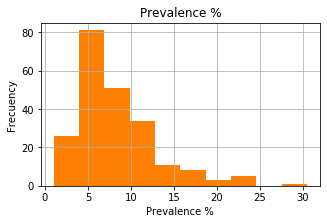

In [208]:
for col in data.columns: 
        if col != 'Country':
            series = to_float(data[col])
            statistical_info(series)
            plot_distribution(series, str(col), col)